# Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Importing necesssary python libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
pd.options.display.float_format = '{:.2f}'.format 
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Exploring Data Set

### Reading input file

In [2]:
Loan_data=pd.read_csv(r'loan.csv')

c:\users\girleffect\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Checking headers in file

In [3]:
Loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Lets see what kind of values have each column

In [4]:
Loan_data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


### checking number of columns and rows

In [5]:
Loan_data.shape

(39717, 111)

### checking the numeric columns

In [6]:
Loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,...,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,...,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,...,nan,nan,nan,nan,2.00,0.00,nan,nan,nan,nan


### Checking the null columns

In [7]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
Loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Removing columns with all null values

In [9]:
Loan_data = Loan_data.dropna(axis=1, how='all')
Loan_data.shape

(39717, 57)

In [10]:
Loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [11]:
Loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Removing columns with more that 90% of null values

In [12]:
droplist1 = [ "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d"]
Loan_data.drop(labels = droplist1, axis=1, inplace = True)

In [13]:
Loan_data.shape

(39717, 54)

### Handling columns with all same values or all values are unique

In [14]:
unique_col_values = Loan_data.nunique()
print(unique_col_values)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [15]:
drop2 = unique_col_values[(unique_col_values.values == 1) | (unique_col_values.values == 39717)]
drop2.index
Loan_data.drop(labels = drop2.index, axis=1, inplace = True)

In [16]:
Loan_data.shape

(39717, 42)

In [17]:
Loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### Here some attributes are not known at the time when loan application is received. Because we have to deal with information LC receive at before approving the loan and decide whether we should approve the loan or not. So removing those columns in which we have infromation after loan is approved.

In [18]:
droplist4=["out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",'delinq_2yrs','earliest_cr_line', 'inq_last_6mths',
           'open_acc','revol_bal','revol_util','total_acc',"total_rec_prncp","total_rec_int","total_rec_late_fee",
           'pub_rec', "recoveries","collection_recovery_fee", "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
Loan_data.drop(labels = droplist4, axis=1, inplace = True)
Loan_data.shape

(39717, 22)

In [19]:
Loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [20]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  desc               

In [21]:
Loan_data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.00
1,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.00


### int_rate is coming as string because of % symbol coming in values. Removing % and converting it into float. Creating a derive column int_rate_flt

In [22]:
Loan_data['int_rate_flt']=Loan_data['int_rate'].apply(lambda x:float(x.replace('%','')))
pd.unique(Loan_data['int_rate_flt'])

array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.59, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88,
       20.11, 16.02, 17.51, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14,
       11.11, 10.37, 16.4 ,  7.66, 10.  , 18.62, 10.74,  5.79,  6.92,
        9.63, 14.54, 12.68, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22,
       19.74, 20.48,

### issue_d is date column. We can extract year and month column from it. creating issue_year and issue_month as derived column

In [23]:
Loan_data['issue_d']=pd.to_datetime(Loan_data['issue_d'],format='%b-%y')
Loan_data['issue_year']=Loan_data['issue_d'].dt.year
Loan_data['issue_month']=Loan_data['issue_d'].dt.month

In [24]:
pd.unique(Loan_data['loan_status'])

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### We need to drop the loan with status “Current” because these are running loan. We are not including it in analysis because our main aim was to analyse the key factors which will impact the loan being fully paid or charged off. Therefore minimising the company loses.


In [25]:
Loan_data=Loan_data[Loan_data['loan_status']!='Current']

## Univariate Analysis

Now analysing the each columns and check what type of values we have in each column

In [26]:
Loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,pub_rec_bankruptcies,int_rate_flt,issue_year,issue_month
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,37880.00,38577.00,38577.00,38577.00
mean,11047.03,10784.06,10222.48,322.47,68777.97,13.27,0.04,11.93,2010.31,7.11
std,7348.44,7090.31,7022.72,208.64,64218.68,6.67,0.20,3.69,0.88,3.41
min,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,5.42,2007.00,1.00
25%,5300.00,5200.00,5000.00,165.74,40000.00,8.13,0.00,8.94,2010.00,4.00
50%,9600.00,9550.00,8733.44,277.86,58868.00,13.37,0.00,11.71,2011.00,7.00
75%,15000.00,15000.00,14000.00,425.55,82000.00,18.56,0.00,14.38,2011.00,10.00
max,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,2.00,24.40,2011.00,12.00


### Now starting the univariate analysis on numeric columns. Numeric columns are picked from df.describe() output

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

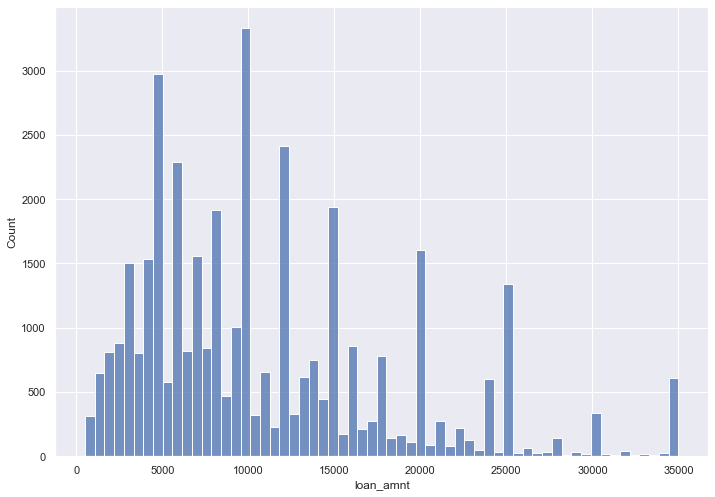

In [27]:
sns.histplot(Loan_data['loan_amnt'])

<AxesSubplot:>

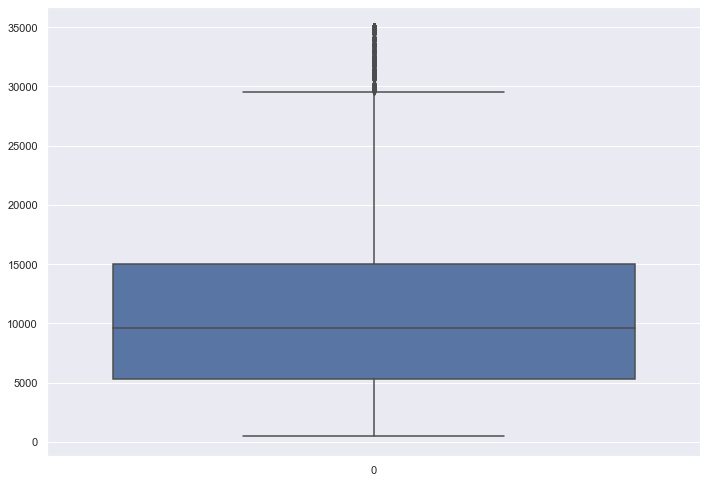

In [28]:
sns.boxplot(data=Loan_data['loan_amnt'])

### Removing the outliers from loan_amnt column

<AxesSubplot:>

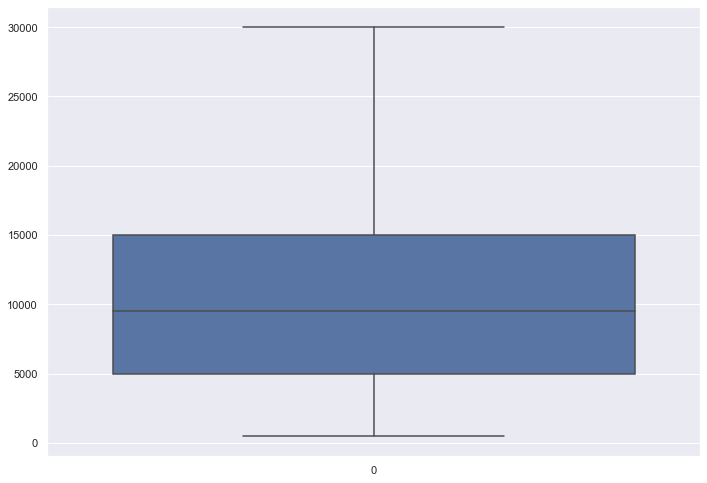

In [29]:
k=np.percentile(Loan_data['loan_amnt'],[98])
Loan_data=Loan_data[Loan_data['loan_amnt']<=k[0]]
sns.boxplot(data=Loan_data['loan_amnt'])

<AxesSubplot:>

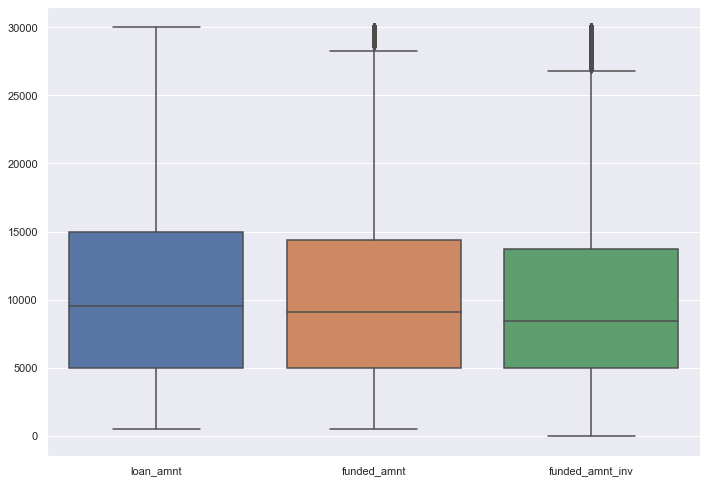

In [30]:
sns.boxplot(data=Loan_data[['loan_amnt','funded_amnt','funded_amnt_inv']])

<AxesSubplot:>

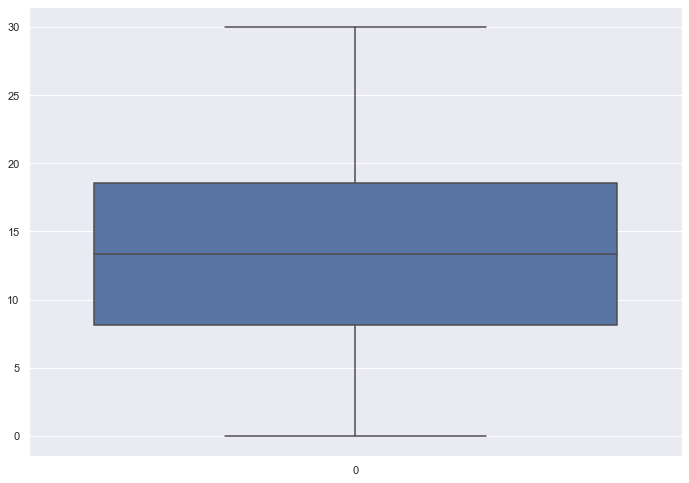

In [31]:
sns.boxplot(data=Loan_data['dti'])

<AxesSubplot:>

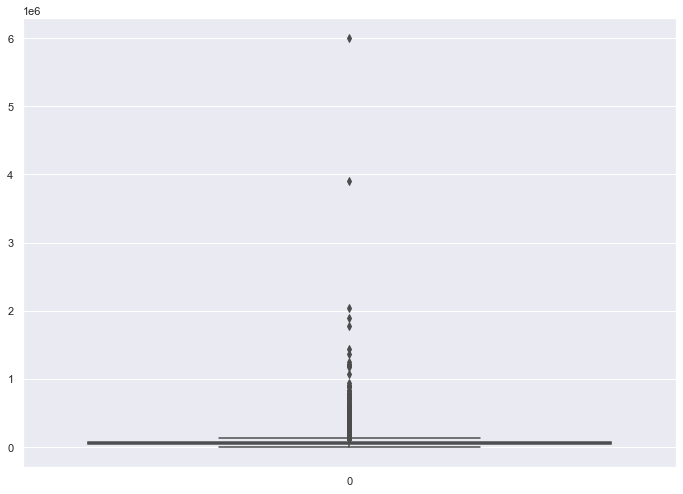

In [32]:
sns.boxplot(data=Loan_data['annual_inc'])

### Here we can observe a lot of outliers in annual_inc column

In [33]:
Loan_data['annual_inc'].mean()

67635.0490935997

In [34]:
Loan_data['annual_inc'].median()

57814.42

In [35]:
max(Loan_data['annual_inc'])

6000000.0

In [36]:
min(Loan_data['annual_inc'])

4000.0

In [37]:
m=np.percentile(Loan_data['annual_inc'],[95])
m

array([140000.])

<AxesSubplot:>

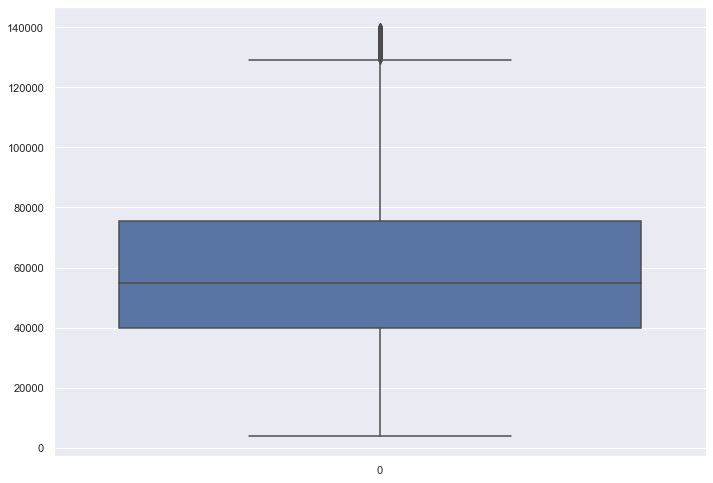

In [38]:
Loan_data=Loan_data[Loan_data['annual_inc']<m[0]]
sns.boxplot(data=Loan_data['annual_inc'])

### checking rows again in data

In [39]:
Loan_data.shape

(35947, 25)

In [40]:
Loan_data.groupby('pub_rec_bankruptcies').count()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,desc,purpose,title,zip_code,addr_state,dti,int_rate_flt,issue_year,issue_month
pub_rec_bankruptcies,,,,,,,,,,,,,,,,,,,,,
0.00,33700,33700,33700,33700,33700,33700,33700,33700,31740,32802,...,33700,22612,33700,33689,33700,33700,33700,33700,33700,33700
1.00,1584,1584,1584,1584,1584,1584,1584,1584,1428,1480,...,1584,1065,1584,1584,1584,1584,1584,1584,1584,1584
2.00,5,5,5,5,5,5,5,5,5,5,...,5,2,5,5,5,5,5,5,5,5


### pub_rec_bankruptcies is a categorical data that we can use further

### Now moving on to the univariate analysis of text columns

In [41]:
Loan_data.groupby('term')['term'].count()

term
 36 months    27483
 60 months     8464
Name: term, dtype: int64

<AxesSubplot:xlabel='int_rate_flt'>

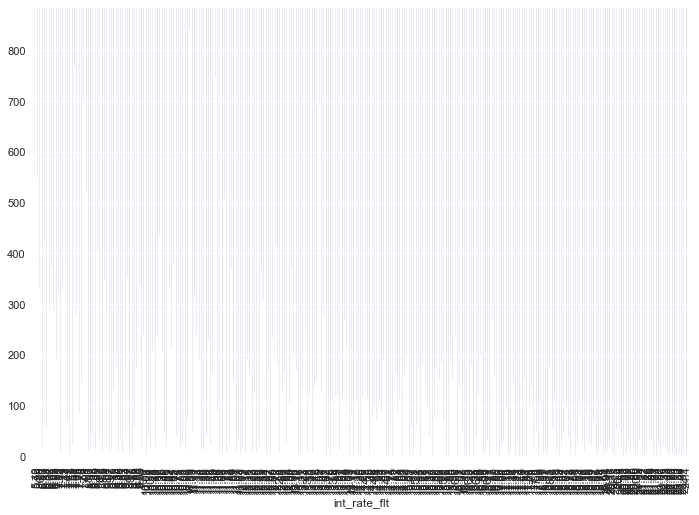

In [42]:
Loan_data.groupby('int_rate_flt')['int_rate_flt'].count().plot(kind='bar')

### There a lot of interest rates values. It is helpful to create categories for range of interest rate while analysing it.

<AxesSubplot:xlabel='grade'>

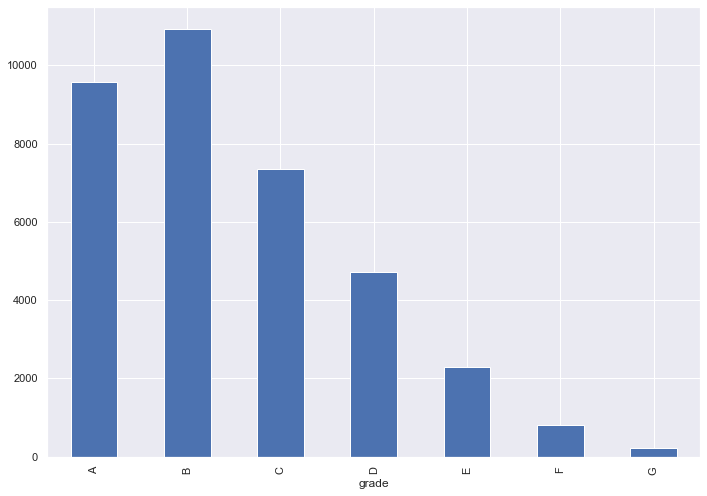

In [43]:
Loan_data.groupby('grade')['grade'].count().plot(kind='bar')

<AxesSubplot:xlabel='sub_grade'>

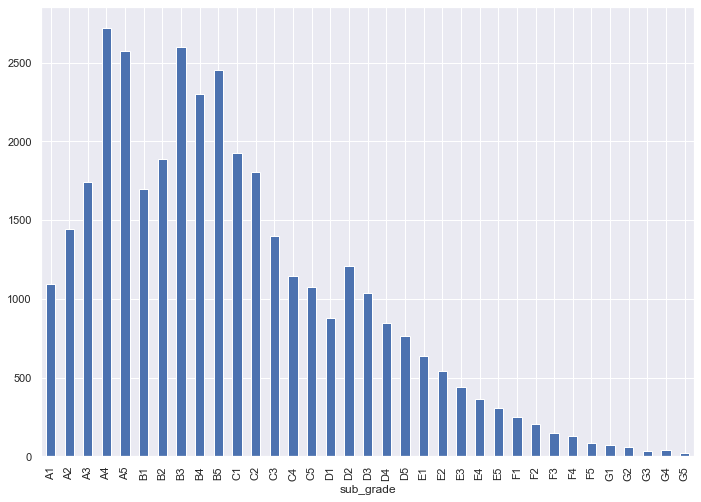

In [44]:
Loan_data.groupby('sub_grade')['sub_grade'].count().plot(kind='bar')

In [45]:
Loan_data.groupby('emp_title').count().sort_values('loan_amnt')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,desc,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,int_rate_flt,issue_year,issue_month
emp_title,,,,,,,,,,,,,,,,,,,,,
old palm inc,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Right at School,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
Right Angle Contracting,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
Rigby Oil Co.,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
Ridgewood Preparatory School,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UPS,50,50,50,50,50,50,50,50,50,50,...,36,50,50,50,50,50,50,50,50,50
US Air Force,51,51,51,51,51,51,51,51,51,51,...,37,51,51,51,51,51,50,51,51,51
AT&T,55,55,55,55,55,55,55,55,55,55,...,39,55,55,55,55,55,55,55,55,55


In [46]:
len(pd.unique(Loan_data['emp_title']))

26442

### There are 25965 unique values which comes around 73% of whole rows in data. We are not including emp_title in further analysis as most the rows are have unique values. Dropping it from data.

In [47]:
Loan_data=Loan_data.drop(['emp_title'], axis = 1)

<AxesSubplot:xlabel='emp_length'>

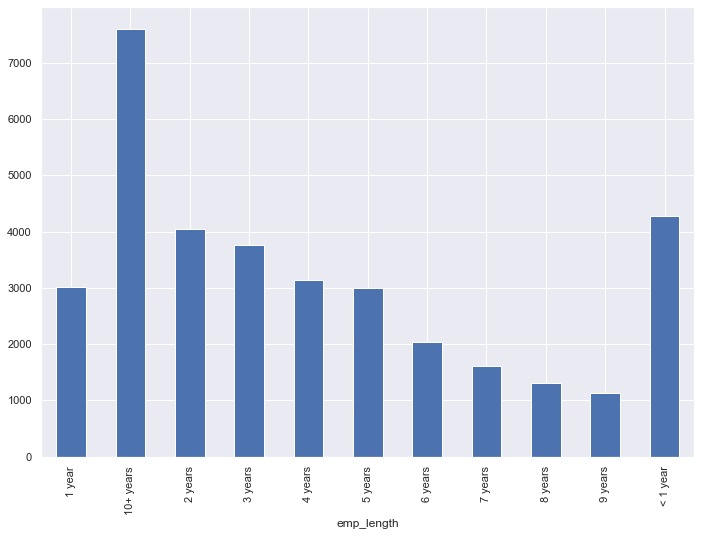

In [48]:
Loan_data.groupby('emp_length')['emp_length'].count().plot(kind='bar')

<AxesSubplot:xlabel='home_ownership'>

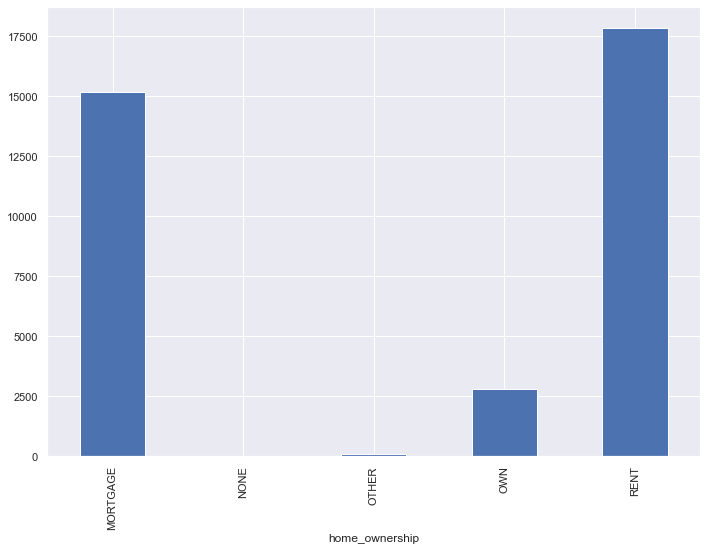

In [49]:
Loan_data.groupby('home_ownership')['home_ownership'].count().plot(kind='bar')

<AxesSubplot:xlabel='verification_status'>

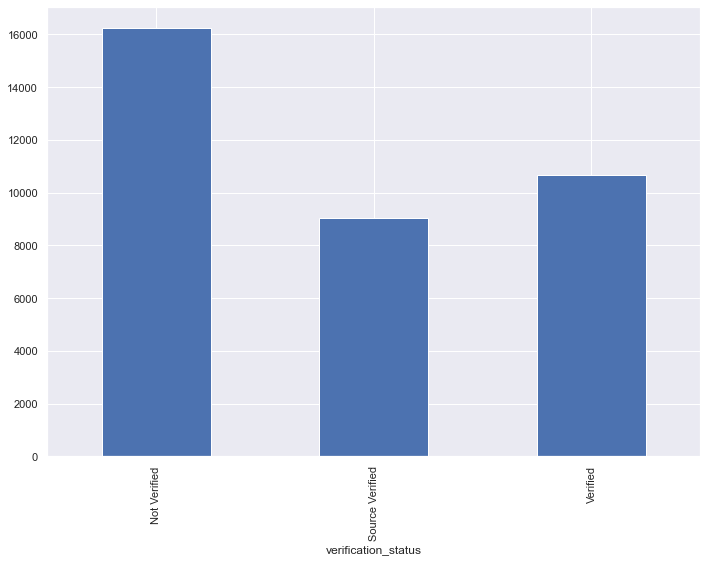

In [50]:
Loan_data.groupby('verification_status')['verification_status'].count().plot(kind='bar')

<AxesSubplot:xlabel='issue_d'>

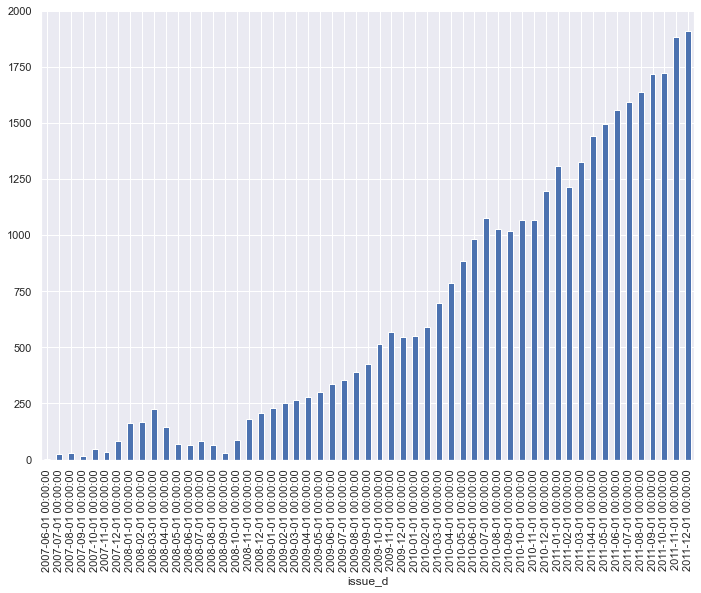

In [51]:
Loan_data.groupby('issue_d')['issue_d'].count().plot(kind='bar')

<AxesSubplot:xlabel='issue_month'>

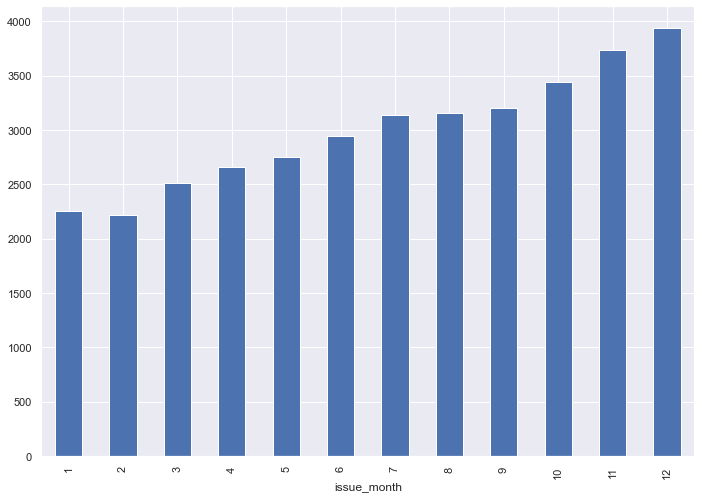

In [52]:
Loan_data.groupby('issue_month')['issue_month'].count().plot(kind='bar')

<AxesSubplot:xlabel='issue_year'>

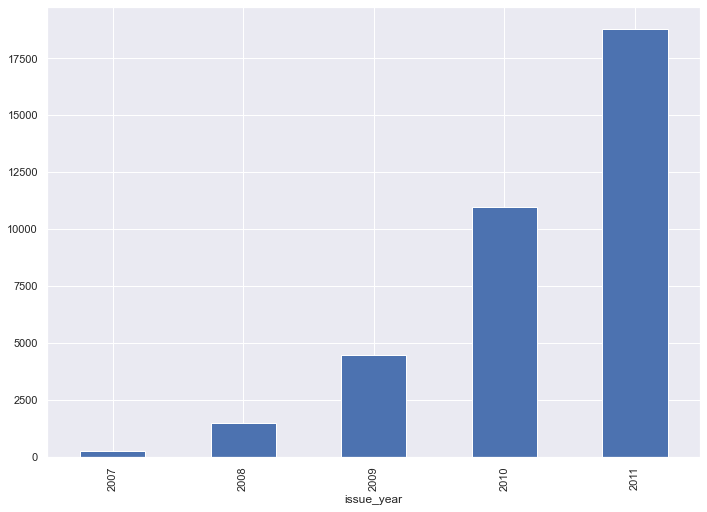

In [53]:
Loan_data.groupby('issue_year')['issue_year'].count().plot(kind='bar')

<AxesSubplot:xlabel='loan_status'>

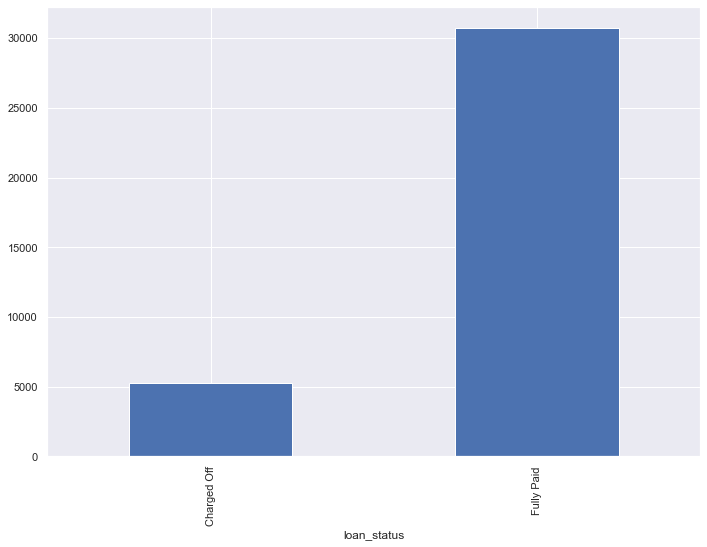

In [54]:
Loan_data.groupby('loan_status')['loan_status'].count().plot(kind='bar')

In [55]:
Loan_data.groupby('desc').count().sort_values('loan_amnt')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,int_rate_flt,issue_year,issue_month
desc,,,,,,,,,,,,,,,,,,,,,
"\t Member# 809768, loan description. (trying to get more investors, doesn't look like we will make it to fully funded by deadline.) How I plan to use the funds: 16x28 Doughboy Pool with all accessories- $7,200 Pool Installation and bury- $2700 Deck surrounding the pool- $6000 Dirt Haul Away- $400 Credit Card payoff amounts: $1344.72, $838.95, and $521.82 What makes me a good borrower: In life I strive to achieve the best and with that I try my best to keep my credit in the best shape possible. I take pride in paying all my bills on time and even early. I have payed off my truck and will be paying off my other car off in March 2012. I have worked very hard to payoff all my credit cards and i'm down to the last three and with this loan they will be payed off which will save me on the interest rates. ??? My monthly budget: I bring home $2,800/month- (This is minus my car insurance, medical, 401 K, and taxes) Which comes out of my check each week. Budget List: House with insurance and tax- $880/month Other Car- $400 Utilities-ALL- $250-$300 School Loan- $130 3- Credit cards- Minimum monthly payment total- $247 (will be paying this monthly expense off with loan.) How stable my job is: I have been with my job for 6 years and have many specialty training skills that make me a more valuable employee.",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Borrower added on 11/22/11 > I'd like to refinance some credit card debt that I accumulated when I was an undergraduate and graduate student.<br>,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Borrower added on 11/22/11 > I would like to refinance a credit card because of my fear that interest rates will start moving higher. I also like the idea of having it paid off in 3 years. I have never been late in making the credit card payment or any payment for that matter. I consider myself an excellent credit risk because I know that I am not going to default on an obligation. I appreciate your consideration.<br>,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Borrower added on 11/22/11 > I would like to pay off credit cards and taxes.<br>,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Borrower added on 11/22/11 > I will be using this loan to pay off high interest credit cards.I have great credit history and a very stable career. Thank you<br>,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Personal Loan,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
personal loan,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Camping Membership,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,0,6,6,6


### We observe that there are 25803 descriptions and the description varies a lot. around 70% data is unique and its tough to understand each description. We can definitely do some NLP and find the +ve and -ve intent and that would have impact on lender being defaulter or not. For now we are droppin it from analysis. For now dropping it from data

In [56]:
Loan_data=Loan_data.drop(['desc'], axis = 1)

<AxesSubplot:xlabel='purpose'>

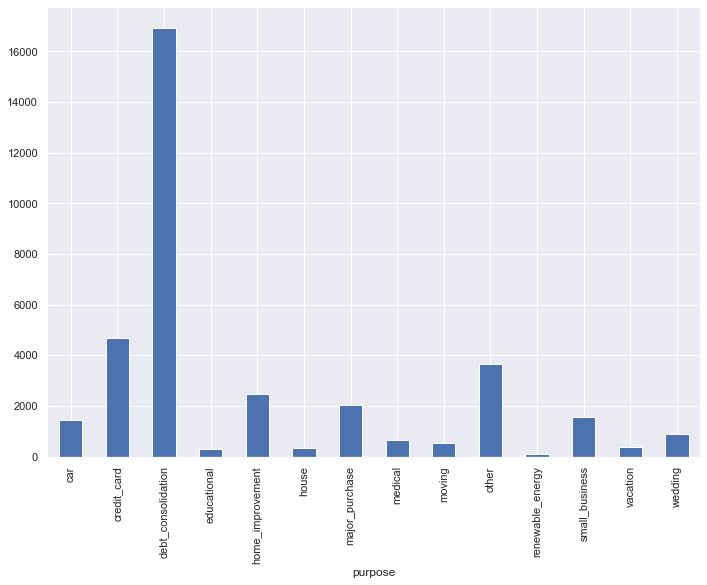

In [57]:
Loan_data.groupby('purpose')['purpose'].count().plot(kind='bar')

<AxesSubplot:xlabel='addr_state'>

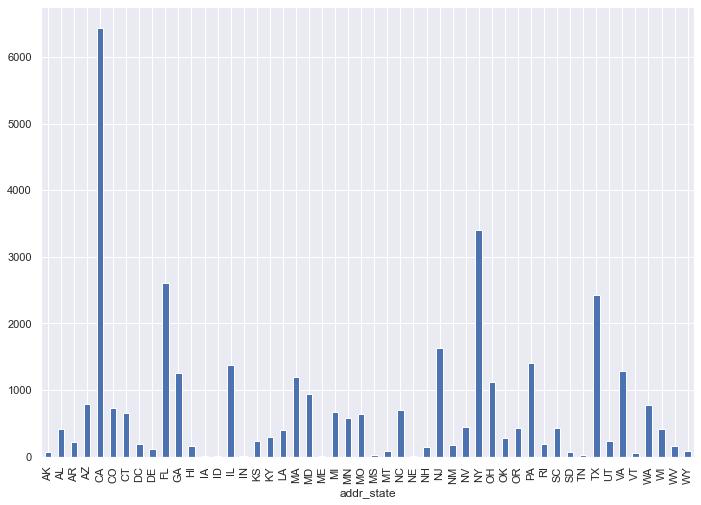

In [58]:
Loan_data.groupby('addr_state')['addr_state'].count().plot(kind='bar')

<AxesSubplot:xlabel='zip_code'>

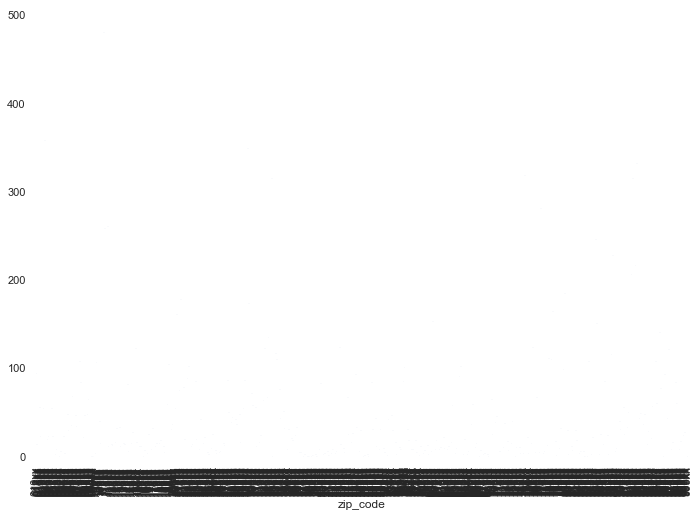

In [59]:
Loan_data.groupby('zip_code')['zip_code'].count().plot(kind='bar')

### There are a lot of zip code values. We will stick to the addr_state column for geographical impact on loan status.

In [60]:
len(pd.unique(Loan_data['title']))

18256

In [61]:
pd.unique(Loan_data['title'])[:100]

array(['Computer', 'bike', 'real estate business', 'personel',
       'My wedding loan I promise to pay back', 'Loan', 'Car Downpayment',
       'Expand Business & Buy Debt Portfolio',
       'Building my credit history.', 'High intrest Consolidation',
       'Consolidation', 'freedom', 'citicard fund', 'Other Loan',
       'Debt Consolidation Loan', 'Home', 'Holiday', 'Medical',
       'lowerratemeanseasiertogetoutofdebt!', 'Freedom From Credit Cards',
       'Debt Cleanup', 'Credit Card Loan', 'Debt Consolidation', 'cash',
       'No more credit card debt!', 'consolidation', 'Other',
       'Credit card repayment loan', 'December 2011 Credit Card Loan',
       'Moving to better job; help a veteran!',
       'Credit Card Consolidation', 'Year End Cleanup', 'debt',
       'Debt-Consolidation ', 'Small Business Loan',
       'Debt Consolidation for a better life', 'Debt Consolitation ',
       'Credit card refinance loan', 'Loan 12142011', 'Car Loan',
       'Credit Cards', ' Bill pay o

### The purpose column is more clearer than title. So we can drop title from our data

In [62]:
Loan_data=Loan_data.drop(['title'], axis = 1)

In [63]:
Loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'int_rate_flt', 'issue_year', 'issue_month'],
      dtype='object')

Here the debt consolidation title is repeated in different format so we can merge them.

In [64]:
Loan_data.shape

(35947, 22)

We will leave the values as it is as we are not seeing any serious impact on our analysis. We are going to use pub_rec_bankruptcies as categorical data in future. Lets start from here.

# Starting the bivariate analysis. Lets see the correlation matrix first.

In [65]:
Loan_data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,pub_rec_bankruptcies,int_rate_flt,issue_year,issue_month
loan_amnt,1.00,0.98,0.93,0.93,0.38,0.09,-0.03,0.26,0.07,0.04
funded_amnt,0.98,1.00,0.95,0.96,0.38,0.09,-0.03,0.27,0.09,0.03
funded_amnt_inv,0.93,0.95,1.00,0.89,0.36,0.10,-0.03,0.27,0.23,0.06
installment,0.93,0.96,0.89,1.00,0.38,0.08,-0.02,0.25,0.02,0.02
annual_inc,0.38,0.38,0.36,0.38,1.00,-0.07,-0.00,0.03,0.02,0.01
dti,0.09,0.09,0.10,0.08,-0.07,1.00,0.00,0.11,0.09,0.02
pub_rec_bankruptcies,-0.03,-0.03,-0.03,-0.02,-0.00,0.00,1.00,0.09,0.00,-0.02
int_rate_flt,0.26,0.27,0.27,0.25,0.03,0.11,0.09,1.00,0.02,0.02
issue_year,0.07,0.09,0.23,0.02,0.02,0.09,0.00,0.02,1.00,-0.04
issue_month,0.04,0.03,0.06,0.02,0.01,0.02,-0.02,0.02,-0.04,1.00


### Observation is that Loan amount, investor amount, funding amount,  installment are strongly correlated.
### Annual income with DTI(Debt-to-income ratio) is negatively correalted.
### That means when annual income is low then DTI is high & vice versa.
### positive correlation between annual income and employment years.
### That means income increases with work experience ;)

# Birvariate analysis

Lets analyse how loan status depends on above columns

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

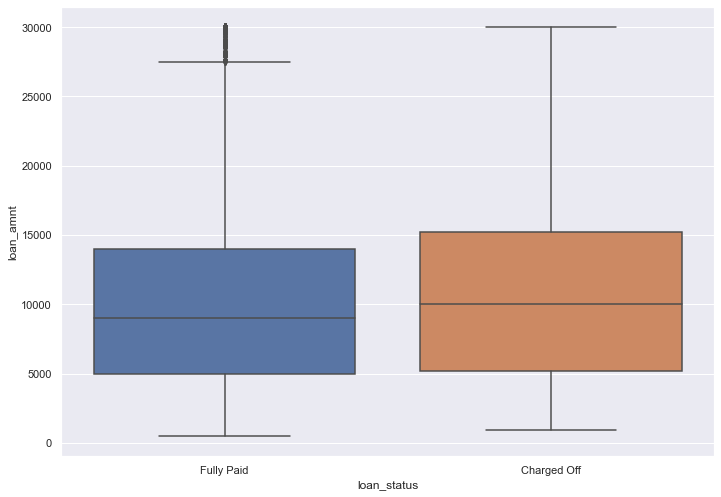

In [66]:
sns.boxplot(data=Loan_data, x='loan_status', y='loan_amnt')

Here we can see loan_amnt is higher then they are more likely to Charged off or Default the loan. 

Lets try to analyze like if a particular amount of loan is given then what is % of getting it default.

In [67]:
min(Loan_data['loan_amnt']),max(Loan_data['loan_amnt'])

(500, 30000)

## loan Amount vs loan Status

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

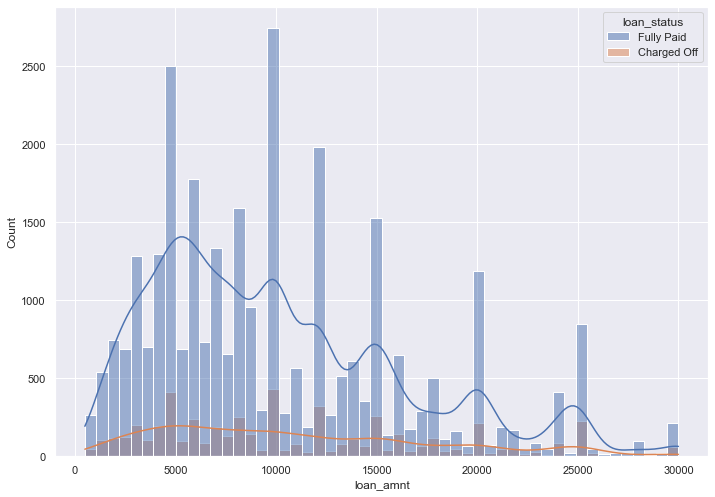

In [68]:
sns.histplot(data=Loan_data, x="loan_amnt", kde=True,hue='loan_status')

### Lets create buckets for loan amount and analyse each bucket.

In [69]:
def loan_amnt_cat(x):
    if x>0 and x<=5000:
        return '0-5000'
    elif x>5000 and x<=10000:
        return '5000-10000'
    elif x>10000 and x<=15000:
        return '10000-15000'
    elif x>15000 and x<=20000:
        return '15000-20000'
    elif x>20000 and x<=25000:
        return '20000-25000'
    elif x>25000 and x<=30000:
        return '25000-30000'

Loan_data['loan_amt_category']=Loan_data['loan_amnt'].apply(loan_amnt_cat)

In [70]:
loan_amount=Loan_data.groupby(['loan_amt_category','loan_status'])['loan_amt_category'].count().rename('cnt_amt_stat')
loan_amount=loan_amount.reset_index(level=['loan_amt_category','loan_status'])
loan_amount=pd.DataFrame(loan_amount)
loan_amount.columns

Index(['loan_amt_category', 'loan_status', 'cnt_amt_stat'], dtype='object')

In [71]:
loan_amount2=Loan_data.groupby(['loan_amt_category'])['loan_amt_category'].count().rename('cnt_amt')
loan_amount2=loan_amount2.reset_index(level=['loan_amt_category'])
loan_amount2=pd.DataFrame(loan_amount2)
loan_amount2.columns

Index(['loan_amt_category', 'cnt_amt'], dtype='object')

In [72]:
loan_amount3=pd.merge(loan_amount,loan_amount2,on='loan_amt_category')
loan_amount3['percentage']=(loan_amount3['cnt_amt_stat']*100)/loan_amount3['cnt_amt']
loan_amount3['start_amt']=loan_amount3['loan_amt_category'].apply(lambda x:int(x.split('-')[0]))
loan_amount3=loan_amount3.sort_values('start_amt')
loan_amount3

,loan_amt_category,loan_status,cnt_amt_stat,cnt_amt,percentage,start_amt
0,0-5000,Charged Off,1299,9305,13.96,0
1,0-5000,Fully Paid,8006,9305,86.04,0
10,5000-10000,Charged Off,1601,12384,12.93,5000
11,5000-10000,Fully Paid,10783,12384,87.07,5000
2,10000-15000,Charged Off,1022,7288,14.02,10000
3,10000-15000,Fully Paid,6266,7288,85.98,10000
4,15000-20000,Charged Off,721,4022,17.93,15000
5,15000-20000,Fully Paid,3301,4022,82.07,15000
6,20000-25000,Charged Off,481,2381,20.20,20000
7,20000-25000,Fully Paid,1900,2381,79.80,20000


In [73]:
sns.set(rc={'figure.figsize':(11,8)})

<AxesSubplot:xlabel='loan_amt_category', ylabel='percentage'>

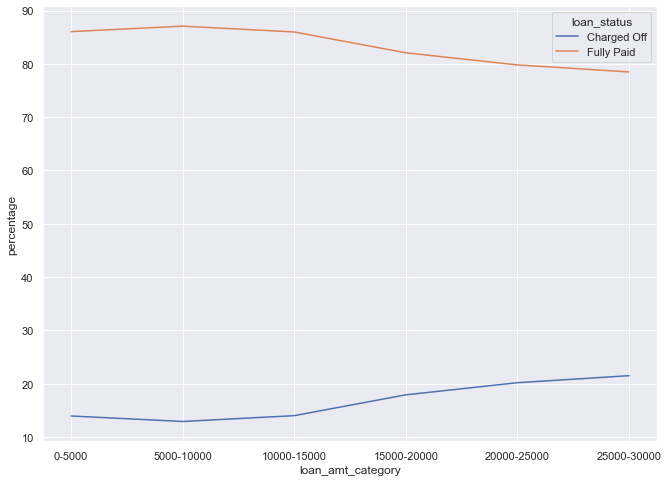

In [74]:
sns.lineplot(data=loan_amount3, x="loan_amt_category", y="percentage",hue='loan_status')

### We clearly see here that as the loan amount increases the chances of going default increases and also decreases the chances of getting it fully paid. To know the percentage in each category.

In [75]:
loan_amount3[['loan_amt_category','loan_status','percentage']]

,loan_amt_category,loan_status,percentage
0,0-5000,Charged Off,13.96
1,0-5000,Fully Paid,86.04
10,5000-10000,Charged Off,12.93
11,5000-10000,Fully Paid,87.07
2,10000-15000,Charged Off,14.02
3,10000-15000,Fully Paid,85.98
4,15000-20000,Charged Off,17.93
5,15000-20000,Fully Paid,82.07
6,20000-25000,Charged Off,20.20
7,20000-25000,Fully Paid,79.80


### Above we can see that if a loan is taken between amount 15000-20000 then pecentage of it getting fully paid is 82% and percentage of getting it charged off is 17.9~18%. Similarly we can detect it for other categories also. 

### We can see that loan taken between amount 25000-30000 has highest chances that it will be defaulted by borrower. and for amount 5000-10000 has least chances of being Charged off.

### The 3 columns loan_amnt,funded_amnt,funded_amnt_inv have same set of values and there fore same impact on loan status

## Annucal income vs loan Status

<AxesSubplot:ylabel='Frequency'>

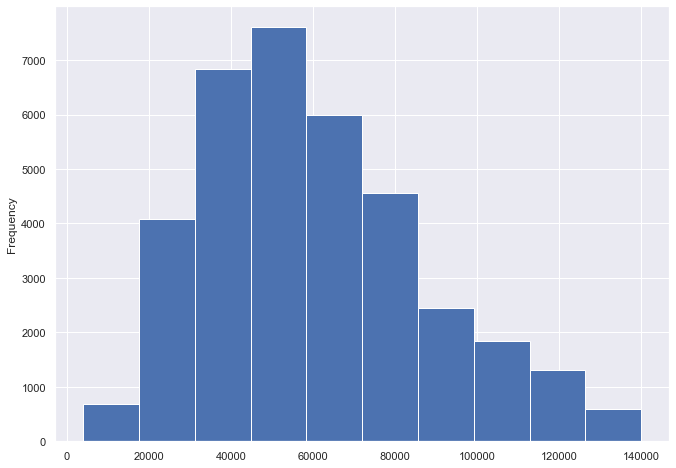

In [77]:
Loan_data['annual_inc'].plot(kind='hist')

### Lets create buckets for analyse and analyse each bucket.

In [78]:
def annual_inc_cat(x):
    if x>0 and x<=20000:
        return '0-20000'
    elif x>20000 and x<=40000:
        return '20000-40000'
    elif x>40000 and x<=60000:
        return '40000-60000'
    elif x>60000 and x<=80000:
        return '60000-80000'
    elif x>80000 and x<=100000:
        return '80000-100000'
    elif x>100000 and x<=120000:
        return '100000-120000'
    elif x>120000 and x<=140000:
        return '120000-140000'

Loan_data['annual_inc_cat']=Loan_data['annual_inc'].apply(annual_inc_cat)

In [79]:
annual_income=Loan_data.groupby(['annual_inc_cat','loan_status'])['annual_inc_cat'].count().rename('cnt_annual_inc_cat_stat')
annual_income=annual_income.reset_index(level=['annual_inc_cat','loan_status'])

annual_income1=Loan_data.groupby(['annual_inc_cat'])['annual_inc_cat'].count().rename('cnt_annual_inc')
annual_income1=annual_income1.reset_index(level=['annual_inc_cat'])
annual_income1=pd.DataFrame(annual_income1)
annual_income1.columns

annual_income2=pd.merge(annual_income,annual_income1,on='annual_inc_cat')
annual_income2['percentage']=(annual_income2['cnt_annual_inc_cat_stat']*100)/annual_income2['cnt_annual_inc']
annual_income2['start_ann']=annual_income2['annual_inc_cat'].apply(lambda x:int(x.split('-')[0]))
annual_income2=annual_income2.sort_values('start_ann')
annual_income2

,annual_inc_cat,loan_status,cnt_annual_inc_cat_stat,cnt_annual_inc,percentage,start_ann
0,0-20000,Charged Off,237,1180,20.08,0
1,0-20000,Fully Paid,943,1180,79.92,0
6,20000-40000,Charged Off,1514,8518,17.77,20000
7,20000-40000,Fully Paid,7004,8518,82.23,20000
8,40000-60000,Charged Off,1713,11229,15.26,40000
9,40000-60000,Fully Paid,9516,11229,84.74,40000
10,60000-80000,Charged Off,974,7478,13.02,60000
11,60000-80000,Fully Paid,6504,7478,86.98,60000
12,80000-100000,Charged Off,486,4346,11.18,80000
13,80000-100000,Fully Paid,3860,4346,88.82,80000


<AxesSubplot:xlabel='annual_inc_cat', ylabel='percentage'>

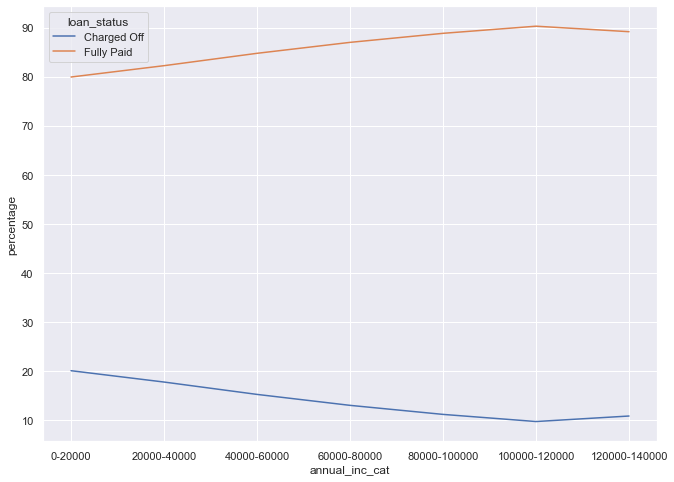

In [80]:
sns.lineplot(data=annual_income2, x="annual_inc_cat", y="percentage",hue='loan_status')

In [81]:
annual_income2[['annual_inc_cat','loan_status','percentage']]

,annual_inc_cat,loan_status,percentage
0,0-20000,Charged Off,20.08
1,0-20000,Fully Paid,79.92
6,20000-40000,Charged Off,17.77
7,20000-40000,Fully Paid,82.23
8,40000-60000,Charged Off,15.26
9,40000-60000,Fully Paid,84.74
10,60000-80000,Charged Off,13.02
11,60000-80000,Fully Paid,86.98
12,80000-100000,Charged Off,11.18
13,80000-100000,Fully Paid,88.82


### Here we observed a completely opposite trend as compared to loan amount vs loan status. Above we can see that if a annual income is between amount 80000-100000 then pecentage of the loan charged off is 11.1=11%. Similarly we can detect it for other categories also. 

### We can see that annual income between 100000-1200000 has least chances that it will be charged off. and for annual income 0-20000 has highest chances of being Charged off.

## Debt To Income Ratio vs loan status

<AxesSubplot:ylabel='Frequency'>

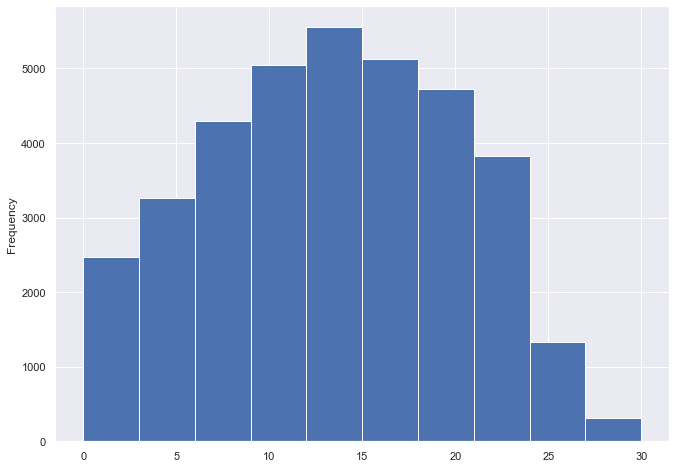

In [82]:
Loan_data['dti'].plot(kind='hist')

<AxesSubplot:xlabel='dti', ylabel='Count'>

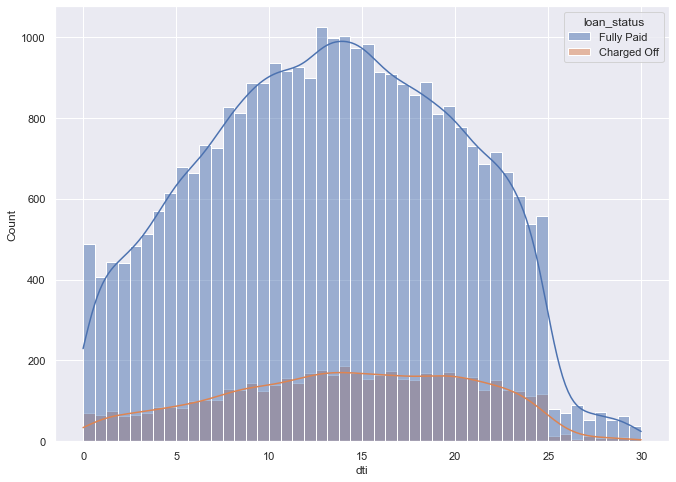

In [83]:
sns.histplot(data=Loan_data, x="dti", kde=True,hue='loan_status')

### From the above graph we observer that when the dti value is low from 0 to 15, the gap between the charged off line and fully paid is increasing. This means that while moving from dti value 0 to 15 there are lower chances that loan will be charged off by borrower. From dti value 15-30 , we clearly see the gap between lines decreasing and borrower is more likely to default the loan. To get the exact % in each category, lets get the % of fully charged and charged off.

In [85]:
def dti_cat(x):
    if x>0 and x<=5:
        return '0-5'
    elif x>5 and x<=10:
        return '5-10'
    elif x>10 and x<=15:
        return '10-15'
    elif x>15 and x<=20:
        return '15-20'
    elif x>20 and x<=25:
        return '20-25'
    elif x>25 and x<=30:
        return '25-30'


Loan_data['dti_cat']=Loan_data['dti'].apply(dti_cat)
dti=Loan_data.groupby(['dti_cat','loan_status'])['dti_cat'].count().rename('cnt_dti_cat_stat')
dti=dti.reset_index(level=['dti_cat','loan_status'])

dti1=Loan_data.groupby(['dti_cat'])['dti_cat'].count().rename('cnt_dti')
dti1=dti1.reset_index(level=['dti_cat'])
dti1=pd.DataFrame(dti1)
dti1.columns

dti2=pd.merge(dti,dti1,on='dti_cat')
dti2['percentage']=(dti2['cnt_dti_cat_stat']*100)/dti2['cnt_dti']
dti2['start_dti']=dti2['dti_cat'].apply(lambda x:int(x.split('-')[0]))
dti2=dti2.sort_values('start_dti')
dti2

,dti_cat,loan_status,cnt_dti_cat_stat,cnt_dti,percentage,start_dti
0,0-5,Charged Off,548,4379,12.51,0
1,0-5,Fully Paid,3831,4379,87.49,0
10,5-10,Charged Off,914,7128,12.82,5
11,5-10,Fully Paid,6214,7128,87.18,5
2,10-15,Charged Off,1306,8982,14.54,10
3,10-15,Fully Paid,7676,8982,85.46,10
4,15-20,Charged Off,1296,8355,15.51,15
5,15-20,Fully Paid,7059,8355,84.49,15
6,20-25,Charged Off,1073,6334,16.94,20
7,20-25,Fully Paid,5261,6334,83.06,20


### Here we get the answer for our question like if dti value falls in particular range then what is % of getting it charged off or fully paid

<AxesSubplot:xlabel='dti_cat', ylabel='percentage'>

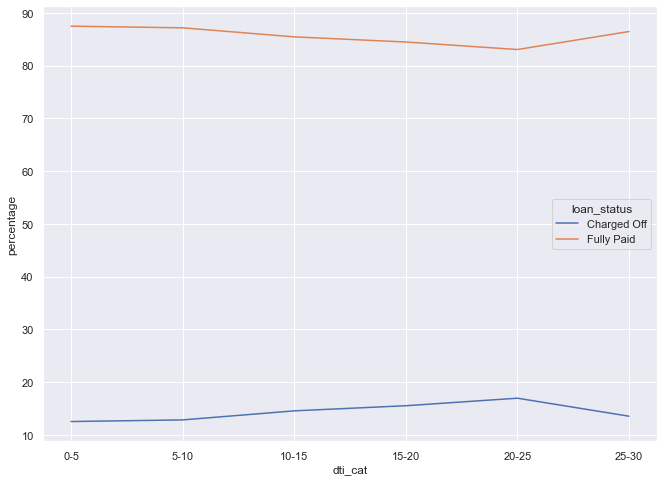

In [87]:
sns.lineplot(data=dti2, x="dti_cat", y="percentage",hue='loan_status')

## Interest rate vs Loan Status

<AxesSubplot:xlabel='int_rate_flt', ylabel='Count'>

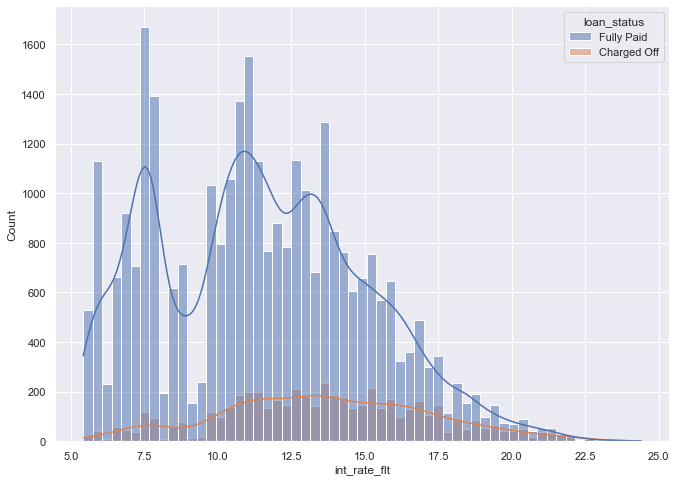

In [88]:
sns.histplot(data=Loan_data, x="int_rate_flt", kde=True,hue='loan_status')

### creating buckets to analyse this

In [90]:
def int_rate_flt_cat(x):
    if x>5 and x<=7.5:
        return '0-5'
    elif x>7.5 and x<=10.0:
        return '5-10'
    elif x>10.0 and x<=12.5:
        return '10-15'
    elif x>12.5 and x<=15.0:
        return '15-20'
    elif x>15.0 and x<=17.5:
        return '20-25'
    elif x>17.5 and x<=20.0:
        return '25-30'
    elif x>20.0 and x<=22.5:
        return '25-30'
    elif x>22.5 and x<=25:
        return '25-30'


Loan_data['int_rate_flt_cat']=Loan_data['int_rate_flt'].apply(dti_cat)
interest_rate=Loan_data.groupby(['int_rate_flt_cat','loan_status'])['int_rate_flt_cat'].count().rename('cnt_int_rate_flt_cat_stat')
interest_rate=interest_rate.reset_index(level=['int_rate_flt_cat','loan_status'])

interest_rate1=Loan_data.groupby(['int_rate_flt_cat'])['int_rate_flt_cat'].count().rename('cnt_int_rate_flt')
interest_rate1=interest_rate1.reset_index(level=['int_rate_flt_cat'])
interest_rate1=pd.DataFrame(interest_rate1)
interest_rate1.columns

interest_rate2=pd.merge(interest_rate,interest_rate1,on='int_rate_flt_cat')
interest_rate2['percentage']=(interest_rate2['cnt_int_rate_flt_cat_stat']*100)/interest_rate2['cnt_int_rate_flt']
interest_rate2['start_int_rate']=interest_rate2['int_rate_flt_cat'].apply(lambda x:int(x.split('-')[0]))
interest_rate2=interest_rate2.sort_values('start_int_rate')
interest_rate2

,int_rate_flt_cat,loan_status,cnt_int_rate_flt_cat_stat,cnt_int_rate_flt,percentage,start_int_rate
6,5-10,Charged Off,809,11727,6.90,5
7,5-10,Fully Paid,10918,11727,93.10,5
0,10-15,Charged Off,2579,17128,15.06,10
1,10-15,Fully Paid,14549,17128,84.94,10
2,15-20,Charged Off,1631,6510,25.05,15
3,15-20,Fully Paid,4879,6510,74.95,15
4,20-25,Charged Off,227,582,39.00,20
5,20-25,Fully Paid,355,582,61.00,20


### Here we get the answer for our question like if dti value falls in particular range then what is % of getting it charged off or fully paid

<AxesSubplot:xlabel='int_rate_flt_cat', ylabel='percentage'>

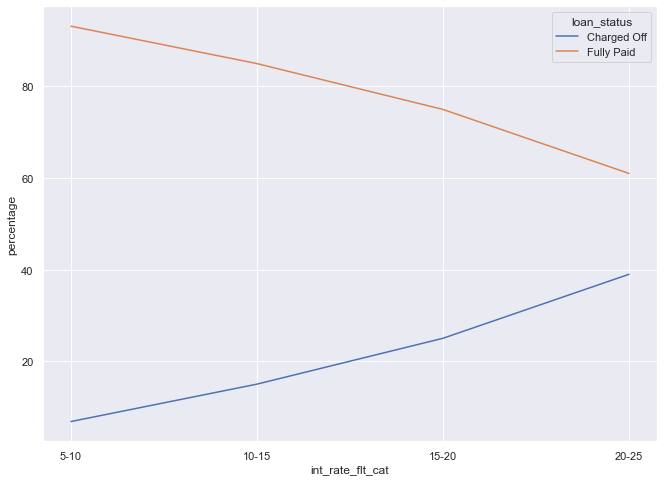

In [91]:
sns.lineplot(data=interest_rate2, x="int_rate_flt_cat", y="percentage",hue='loan_status')

### This is completely showing that as the interest rate goes higher it is more likely to get default as compared to lower interest rates

## Employee length of service vs loan status

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

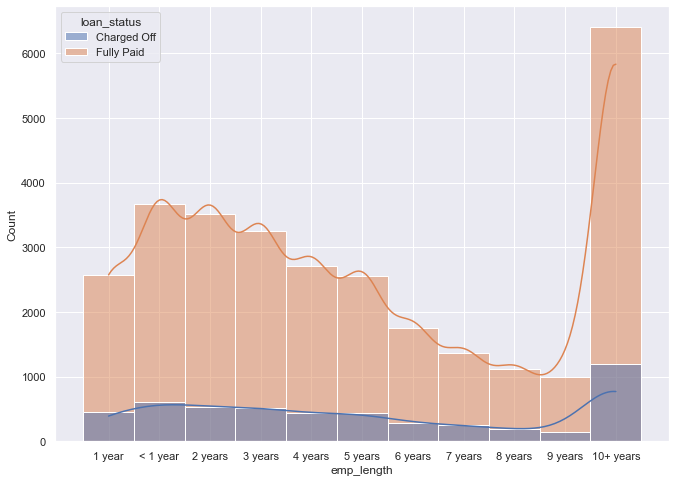

In [93]:
Loan_data['emp_length_int']=Loan_data['emp_length'].apply(lambda x: int(x.replace('years','').replace('<','').replace('+','').replace('year','').strip()) if x is not np.nan else 0)
Loan_data=Loan_data.sort_values('emp_length_int')
sns.histplot(data=Loan_data, x="emp_length", kde=True,hue='loan_status')

### We clearly see that large amount of loan has been disbursed for employee havong more that 10 years of experience.

In [96]:
employee_los=Loan_data.groupby(['emp_length','loan_status'])['emp_length'].count().rename('cnt_emp_length_stat')
employee_los=employee_los.reset_index(level=['emp_length','loan_status'])

employee_los1=Loan_data.groupby(['emp_length'])['emp_length'].count().rename('cnt_emp_length')
employee_los1=employee_los1.reset_index(level=['emp_length'])
employee_los1=pd.DataFrame(employee_los1)
employee_los1.columns

employee_los2=pd.merge(employee_los,employee_los1,on='emp_length')
employee_los2['percentage']=(employee_los2['cnt_emp_length_stat']*100)/employee_los2['cnt_emp_length']
employee_los2['emp_length_int']=employee_los2['emp_length'].apply(lambda x: (x.replace('years','').replace('<','').replace('+','').replace('year','')).strip() if x is not np.nan else 0)
employee_los2=employee_los2.sort_values('emp_length_int')
employee_los2

,emp_length,loan_status,cnt_emp_length_stat,cnt_emp_length,percentage,emp_length_int
0,1 year,Charged Off,445,3017,14.75,1
20,< 1 year,Charged Off,602,4270,14.10,1
21,< 1 year,Fully Paid,3668,4270,85.90,1
1,1 year,Fully Paid,2572,3017,85.25,1
3,10+ years,Fully Paid,6406,7605,84.23,10
2,10+ years,Charged Off,1199,7605,15.77,10
4,2 years,Charged Off,536,4053,13.22,2
5,2 years,Fully Paid,3517,4053,86.78,2
6,3 years,Charged Off,519,3766,13.78,3
7,3 years,Fully Paid,3247,3766,86.22,3


### In terms of percentage of in different employee length categories we see the fully paid borrwers % varies between 84 to 87 % and charged of borrowers lies between 13 to 16%. Its more of same for all. Very little difference. Employee length does not have much impact on loan Status

<AxesSubplot:xlabel='emp_length', ylabel='percentage'>

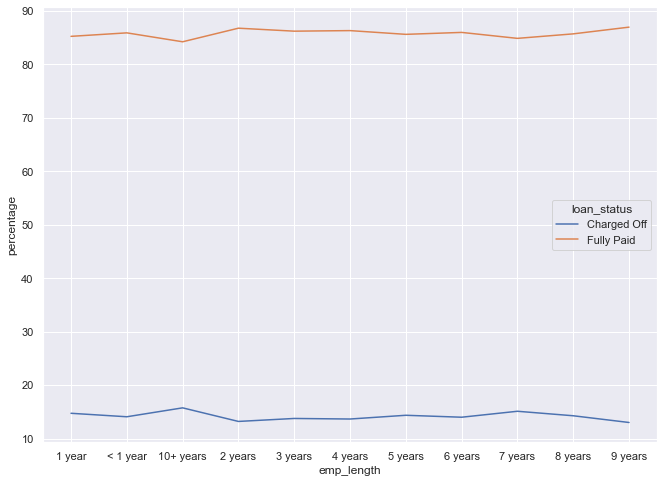

In [97]:
sns.lineplot(data=employee_los2,x='emp_length',y='percentage',hue='loan_status')

## Grade vs loan_status

<AxesSubplot:xlabel='grade', ylabel='Count'>

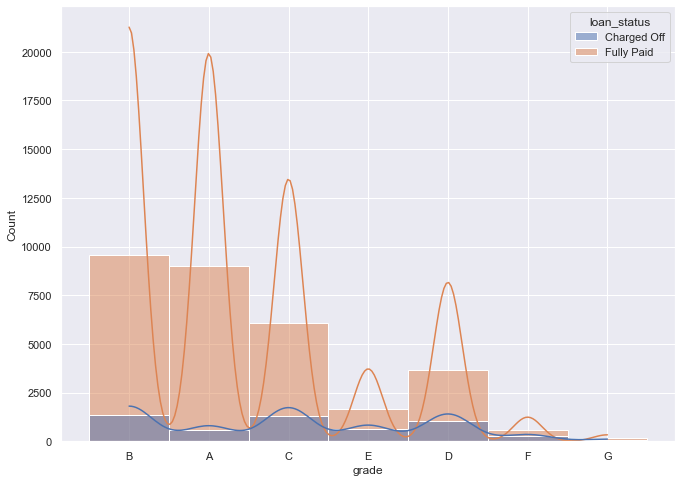

In [98]:
sns.histplot(data=Loan_data, x="grade", kde=True,hue='loan_status')

### We can observer that B grade users have taken maximum number of loans.

In [99]:
grades1=Loan_data.groupby(['grade','loan_status'])['grade'].count().rename('cnt_grade_stat')
grades1=grades1.reset_index(level=['grade','loan_status'])

grades2=Loan_data.groupby(['grade'])['grade'].count().rename('cnt_grade')
grades2=grades2.reset_index(level=['grade'])
grades2=pd.DataFrame(grades2)
grades2.columns

grades=pd.merge(grades1,grades2,on='grade')
grades['percentage']=(grades['cnt_grade_stat']*100)/grades['cnt_grade']

grades

,grade,loan_status,cnt_grade_stat,cnt_grade,percentage
0,A,Charged Off,591,9570,6.18
1,A,Fully Paid,8979,9570,93.82
2,B,Charged Off,1353,10940,12.37
3,B,Fully Paid,9587,10940,87.63
4,C,Charged Off,1293,7362,17.56
5,C,Fully Paid,6069,7362,82.44
6,D,Charged Off,1050,4730,22.20
7,D,Fully Paid,3680,4730,77.80
8,E,Charged Off,615,2292,26.83
9,E,Fully Paid,1677,2292,73.17


In terms of percentage of in different grade of borrowers, we see that borrowers with good grade are more like to fully pay the loan. With each grade you can see 4%-5% drop in percentage of people paying the whole loan and 4%-5% increase in people will not pay the loan.

GRADE is key factor while approving loan to borrowers


<AxesSubplot:xlabel='grade', ylabel='percentage'>

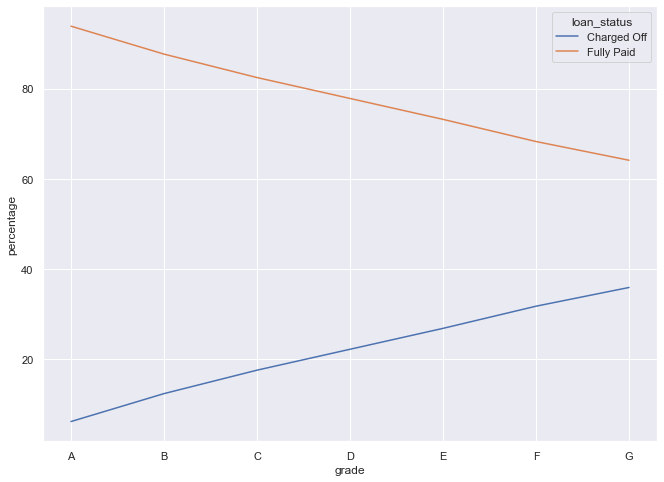

In [100]:
sns.lineplot(data=grades,x='grade',y='percentage',hue='loan_status')

## Sub Grade vs loan_status

In [101]:
subgrade1=Loan_data.groupby(['sub_grade','loan_status'])['sub_grade'].count().rename('cnt_sub_grade_stat')
subgrade1=subgrade1.reset_index(level=['sub_grade','loan_status'])

subgrade2=Loan_data.groupby(['sub_grade'])['sub_grade'].count().rename('cnt_sub_grade')
subgrade2=subgrade2.reset_index(level=['sub_grade'])
subgrade2=pd.DataFrame(subgrade2)
subgrade2.columns

subgrade=pd.merge(subgrade1,subgrade2,on='sub_grade')
subgrade['percentage']=(subgrade['cnt_sub_grade_stat']*100)/subgrade['cnt_sub_grade']

subgrade

,sub_grade,loan_status,cnt_sub_grade_stat,cnt_sub_grade,percentage
0,A1,Charged Off,30,1094,2.74
1,A1,Fully Paid,1064,1094,97.26
2,A2,Charged Off,74,1442,5.13
3,A2,Fully Paid,1368,1442,94.87
4,A3,Charged Off,103,1745,5.90
...,...,...,...,...,...
65,G3,Fully Paid,19,36,52.78
66,G4,Charged Off,9,42,21.43
67,G4,Fully Paid,33,42,78.57
68,G5,Charged Off,9,21,42.86


<AxesSubplot:xlabel='sub_grade', ylabel='percentage'>

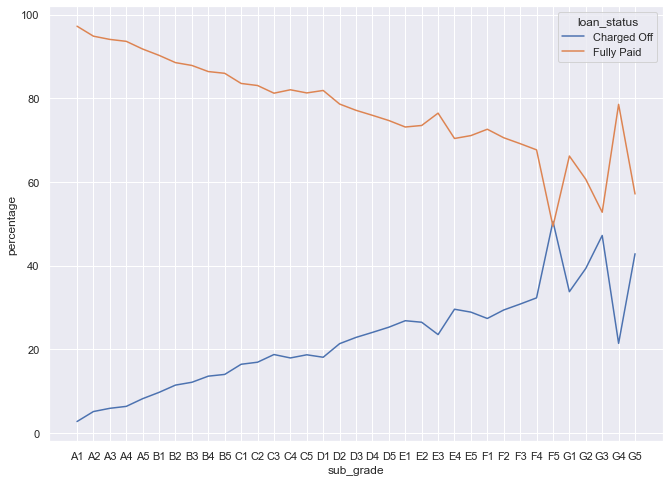

In [102]:
sns.lineplot(data=subgrade,x='sub_grade',y='percentage',hue='loan_status')

Here we can see that while analysing the grades we got straight line but within grade G we are getting some unexpected result. Till F grade we can use the grade column and G grade we can deep dive into subgrades.

In [103]:
subgrade[subgrade['sub_grade'].str.contains('G')]

,sub_grade,loan_status,cnt_sub_grade_stat,cnt_sub_grade,percentage
60,G1,Charged Off,25,74,33.78
61,G1,Fully Paid,49,74,66.22
62,G2,Charged Off,24,61,39.34
63,G2,Fully Paid,37,61,60.66
64,G3,Charged Off,17,36,47.22
65,G3,Fully Paid,19,36,52.78
66,G4,Charged Off,9,42,21.43
67,G4,Fully Paid,33,42,78.57
68,G5,Charged Off,9,21,42.86
69,G5,Fully Paid,12,21,57.14


### So within G grade, we can see the subgrade G4 has good % of getting the loan paid fully and G3 has least chance.

In [119]:
purpose1=Loan_data.groupby(['purpose','loan_status'])['purpose'].count().rename('cnt_purpose_stat')
purpose1=purpose1.reset_index(level=['purpose','loan_status'])

purpose2=Loan_data.groupby(['purpose'])['purpose'].count().rename('cnt_purpose')
purpose2=purpose2.reset_index(level=['purpose'])
purpose2=pd.DataFrame(purpose2)
purpose2.columns

purpose=pd.merge(purpose1,purpose2,on='purpose')
purpose['percentage']=(purpose['cnt_purpose_stat']*100)/purpose['cnt_purpose']

purpose=purpose.sort_values('percentage')
purpose

,purpose,loan_status,cnt_purpose_stat,cnt_purpose,percentage
26,wedding,Charged Off,90,883,10.19
12,major_purchase,Charged Off,215,2024,10.62
2,credit_card,Charged Off,505,4698,10.75
0,car,Charged Off,159,1444,11.01
8,home_improvement,Charged Off,311,2490,12.49
24,vacation,Charged Off,52,364,14.29
4,debt_consolidation,Charged Off,2579,16912,15.25
10,house,Charged Off,52,329,15.81
14,medical,Charged Off,101,635,15.91
18,other,Charged Off,599,3664,16.35


<AxesSubplot:xlabel='percentage', ylabel='purpose'>

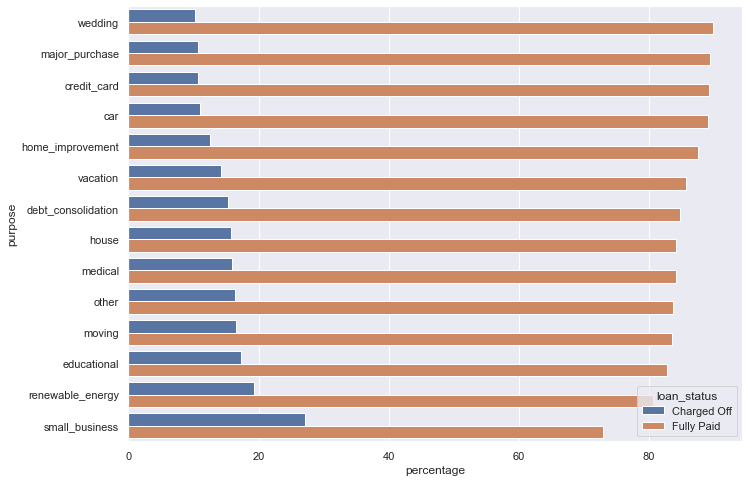

In [120]:
sns.barplot(data=purpose,y='purpose',x='percentage',hue='loan_status')

### We can see from the plot that loan for the purpose of wedding is more likely to be fully paid and least charged off. Loan for the purpose of small_businesses are more likely to default. The borrower mentioning purpose wedding,major_purchase, credit_card or car  have almost same chances of getting it fully paid.

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

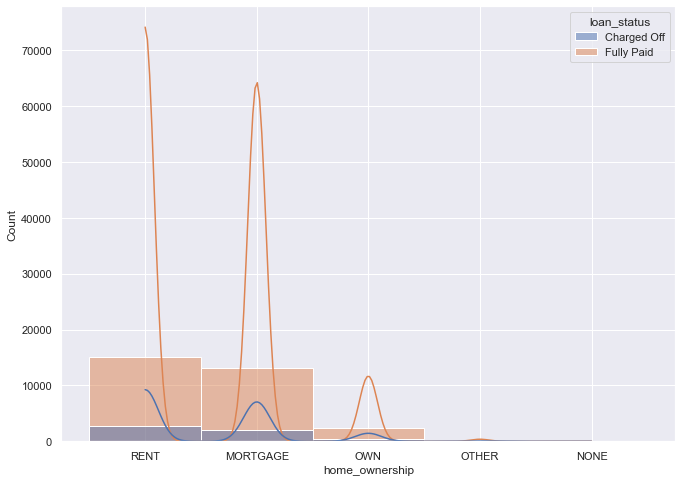

In [107]:
sns.histplot(data=Loan_data, x="home_ownership", kde=True,hue='loan_status')

### Rented people are taking more loan

In [121]:
home_own1=Loan_data.groupby(['home_ownership','loan_status'])['home_ownership'].count().rename('cnt_home_ownership_stat')
home_own1=home_own1.reset_index(level=['home_ownership','loan_status'])

home_own2=Loan_data.groupby(['home_ownership'])['home_ownership'].count().rename('cnt_home_ownership')
home_own2=home_own2.reset_index(level=['home_ownership'])
home_own2=pd.DataFrame(home_own2)
home_own2.columns

home_own=pd.merge(home_own1,home_own2,on='home_ownership')
home_own['percentage']=(home_own['cnt_home_ownership_stat']*100)/home_own['cnt_home_ownership']

home_own=home_own.sort_values('percentage')
home_own

,home_ownership,loan_status,cnt_home_ownership_stat,cnt_home_ownership,percentage
0,MORTGAGE,Charged Off,2080,15198,13.69
5,OWN,Charged Off,422,2805,15.04
7,RENT,Charged Off,2727,17849,15.28
3,OTHER,Charged Off,17,92,18.48
4,OTHER,Fully Paid,75,92,81.52
8,RENT,Fully Paid,15122,17849,84.72
6,OWN,Fully Paid,2383,2805,84.96
1,MORTGAGE,Fully Paid,13118,15198,86.31
2,NONE,Fully Paid,3,3,100.00


<AxesSubplot:xlabel='home_ownership', ylabel='percentage'>

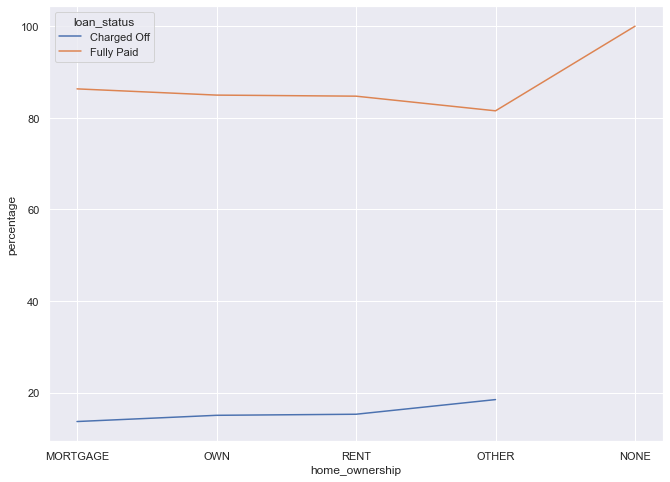

In [122]:
sns.lineplot(data=home_own,x='home_ownership',y='percentage',hue='loan_status')

## If we ignore the None , category then we can see that borrower with mortgage has slightly more chance to pay the loan successfully while other category has less chances of getting it paid.

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

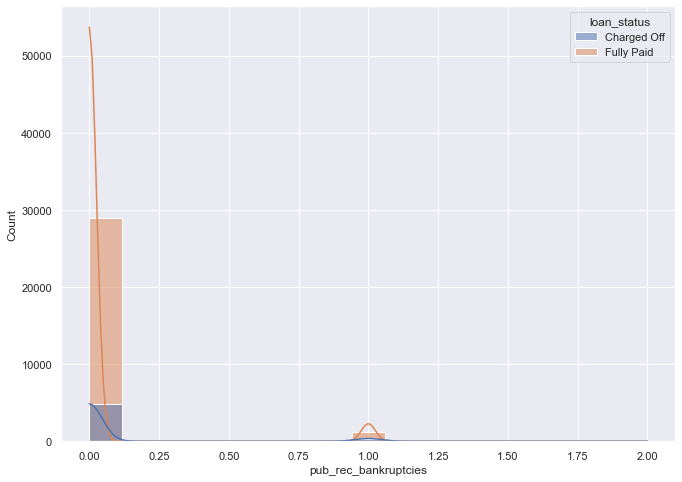

In [110]:
sns.histplot(data=Loan_data, x="pub_rec_bankruptcies", kde=True,hue='loan_status')

### Here we can observer that people with 0 public recorded bankruptcies are more likely to pay the full loan. Those are the people taking more loans

<AxesSubplot:xlabel='verification_status', ylabel='Count'>

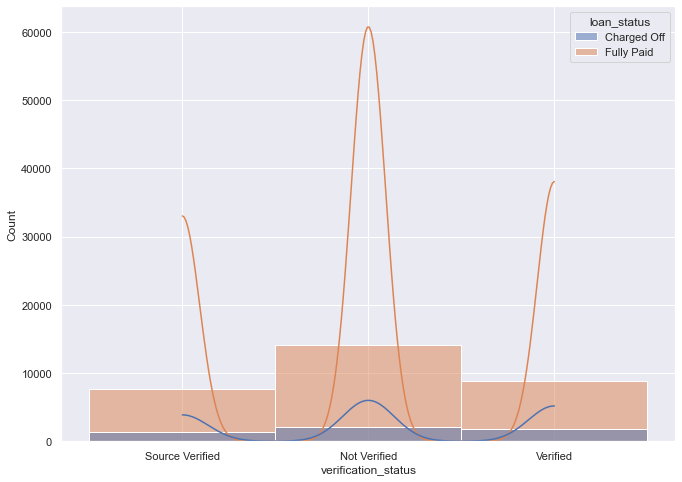

In [111]:
sns.histplot(data=Loan_data, x="verification_status", kde=True,hue='loan_status')

In [123]:
verify1=Loan_data.groupby(['verification_status','loan_status'])['verification_status'].count().rename('cnt_verification_status_stat')
verify1=verify1.reset_index(level=['verification_status','loan_status'])

verify2=Loan_data.groupby(['verification_status'])['verification_status'].count().rename('cnt_verification_status')
verify2=verify2.reset_index(level=['verification_status'])
verify2=pd.DataFrame(verify2)
verify2.columns

verify=pd.merge(verify1,verify2,on='verification_status')
verify['percentage']=(verify['cnt_verification_status_stat']*100)/verify['cnt_verification_status']

verify=verify.sort_values('percentage')
verify

,verification_status,loan_status,cnt_verification_status_stat,cnt_verification_status,percentage
0,Not Verified,Charged Off,2090,16240,12.87
2,Source Verified,Charged Off,1350,9039,14.94
4,Verified,Charged Off,1806,10668,16.93
5,Verified,Fully Paid,8862,10668,83.07
3,Source Verified,Fully Paid,7689,9039,85.06
1,Not Verified,Fully Paid,14150,16240,87.13


<AxesSubplot:xlabel='verification_status', ylabel='percentage'>

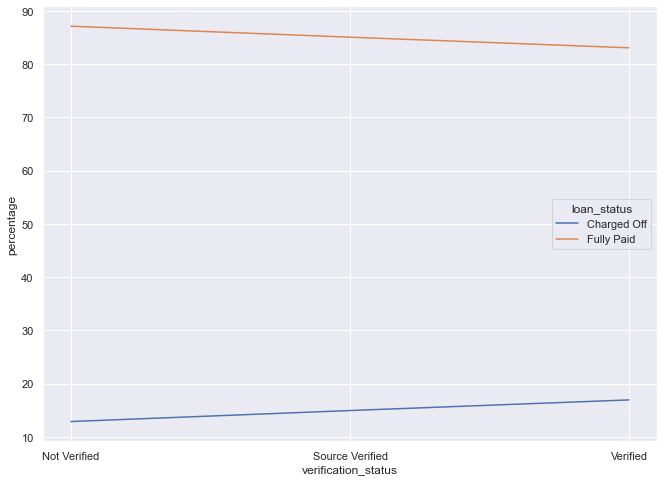

In [124]:
sns.lineplot(data=verify,x='verification_status',y='percentage',hue='loan_status')

### There is 2% more confidence on borrower who are not verified that they can pay the full loan as compared to source verified. 

<AxesSubplot:xlabel='Count', ylabel='addr_state'>

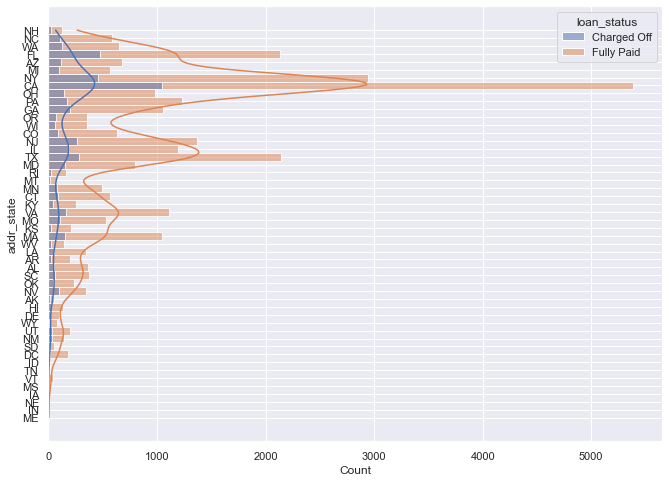

In [125]:
sns.histplot(data=Loan_data, y="addr_state", kde=True,hue='loan_status')

### CA state has maximum number of borrowers. NY comes second

In [127]:
address1=Loan_data.groupby(['addr_state','loan_status'])['addr_state'].count().rename('cnt_addr_state_stat')
address1=address1.reset_index(level=['addr_state','loan_status'])

address2=Loan_data.groupby(['addr_state'])['addr_state'].count().rename('cnt_addr_state')
address2=address2.reset_index(level=['addr_state'])
address2=pd.DataFrame(address2)
address2.columns

address=pd.merge(address1,address2,on='addr_state')
address['percentage']=(address['cnt_addr_state_stat']*100)/address['cnt_addr_state']

address=address.sort_values('percentage')
address

,addr_state,loan_status,cnt_addr_state_stat,cnt_addr_state,percentage
95,WY,Charged Off,3,78,3.85
14,DC,Charged Off,12,190,6.32
47,MS,Charged Off,2,19,10.53
16,DE,Charged Off,12,108,11.11
4,AR,Charged Off,26,226,11.50
...,...,...,...,...,...
15,DC,Fully Paid,178,190,93.68
96,WY,Fully Paid,75,78,96.15
29,IN,Fully Paid,9,9,100.00
24,IA,Fully Paid,5,5,100.00


<AxesSubplot:xlabel='addr_state', ylabel='percentage'>

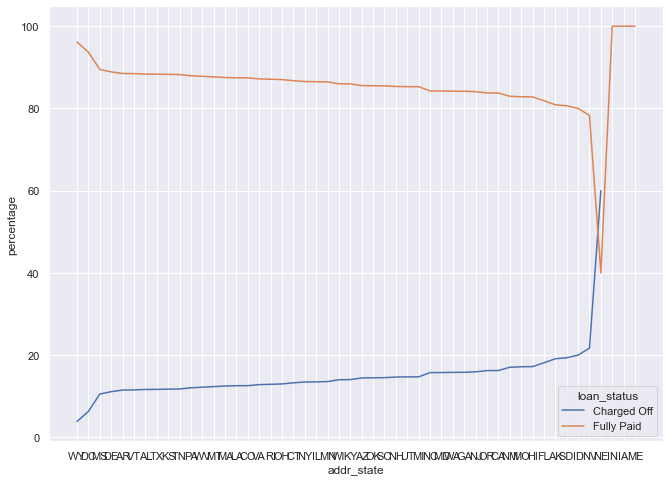

In [128]:
sns.lineplot(data=address,x='addr_state',y='percentage',hue='loan_status')

### The loans in state IN, IA and ME are fully paid. there are no defaulters in that state. But the number of loans taken in these states are very less.

### If I plot the number of states have more than 90% of loan which was fully paid by borrowers. We can get below visualisation and see that only DC, WY, IN, IA and ME qualifies into that creteria


<AxesSubplot:xlabel='addr_state', ylabel='percentage'>

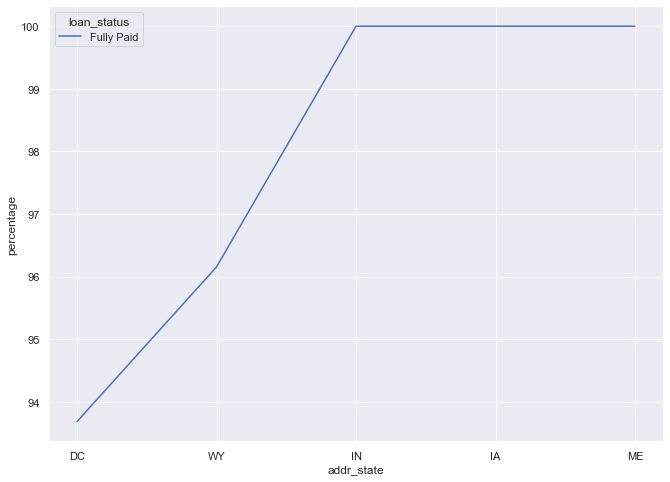

In [129]:
sns.lineplot(data=address[address['percentage']>90],x='addr_state',y='percentage',hue='loan_status')

### If I plot the number of states have more than 19% of loan which was charged off by borrowers. We can get below visualisation and see that only AK, SD,ID,NV and NE qualifies into that creteria¶

<AxesSubplot:xlabel='addr_state', ylabel='percentage'>

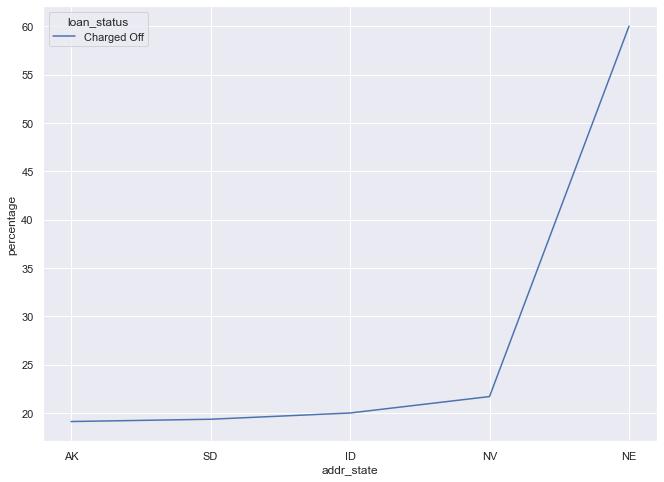

In [131]:
sns.lineplot(data=address[(address['percentage']>19) & (address['loan_status']=='Charged Off')],x='addr_state',y='percentage',hue='loan_status')

# Bivariate Analysis without loan Status

#### loan amount vs installment

<AxesSubplot:xlabel='loan_amt_category', ylabel='installment'>

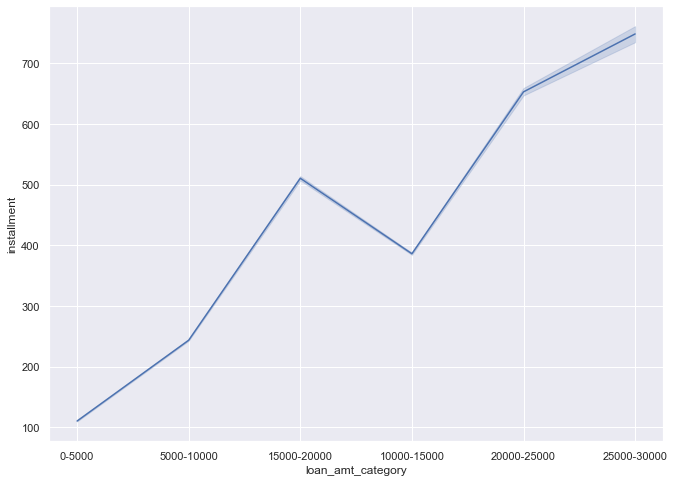

In [133]:
sns.lineplot(data=Loan_data, x='loan_amt_category', y='installment')

### We can observer that as the loan amount increases the installment increases  only exception as 10000-15000

### Loan amount vs interest rate

<AxesSubplot:xlabel='loan_amt_category', ylabel='int_rate_flt'>

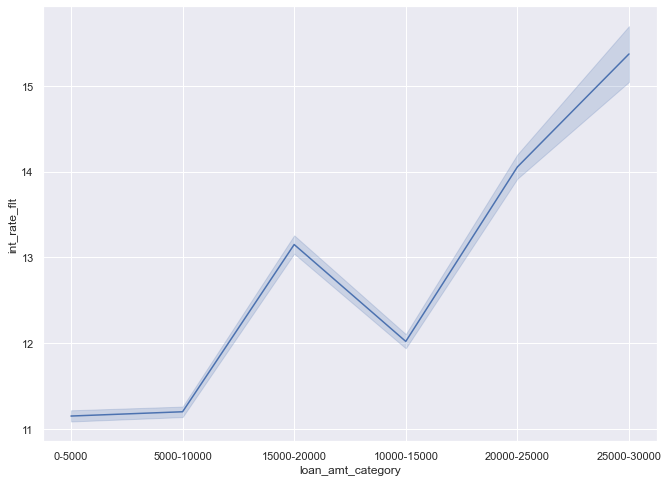

In [134]:
sns.lineplot(data=Loan_data, x='loan_amt_category', y='int_rate_flt')

### Large amount loans are dispursed at higher interest rate only exception at 10000-15000

### loan amount vs funded amount invested

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='loan_amnt'>

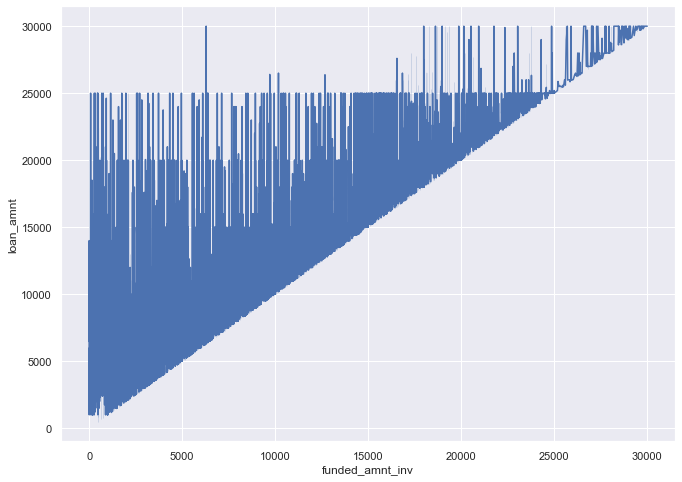

In [135]:
sns.lineplot(data=Loan_data, x='funded_amnt_inv', y='loan_amnt')

Both are directly proportional to each other.

#### laon amount vs issue Year

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

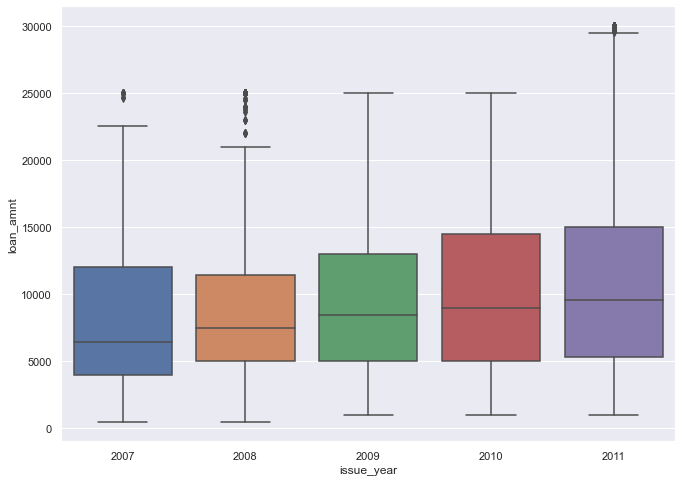

In [137]:
sns.boxplot(data=Loan_data, y='loan_amnt', x='issue_year')

Year by year the amount of loan increases. But the 75th percentile for 2008 is lowest among all.

#### loan amount vs purpose

<AxesSubplot:xlabel='loan_amnt', ylabel='purpose'>

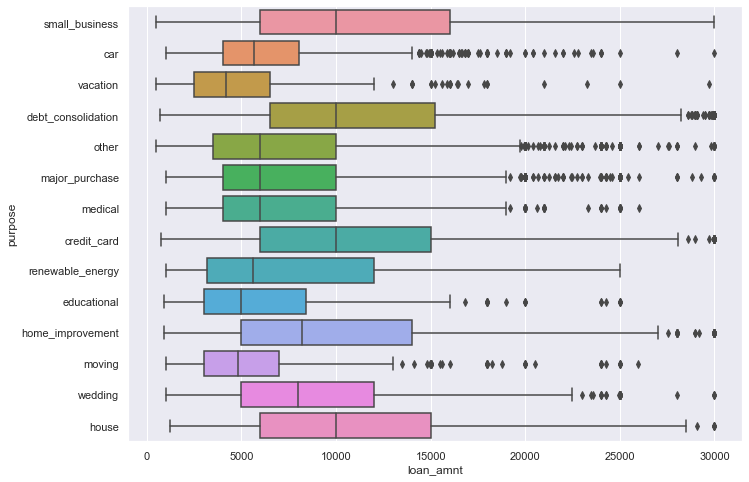

In [138]:
sns.boxplot(data=Loan_data, x='loan_amnt', y='purpose')

Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
Debt consolidation is second and Credit card comes 3rd.

#### loan amount vs term

<AxesSubplot:xlabel='loan_amnt', ylabel='term'>

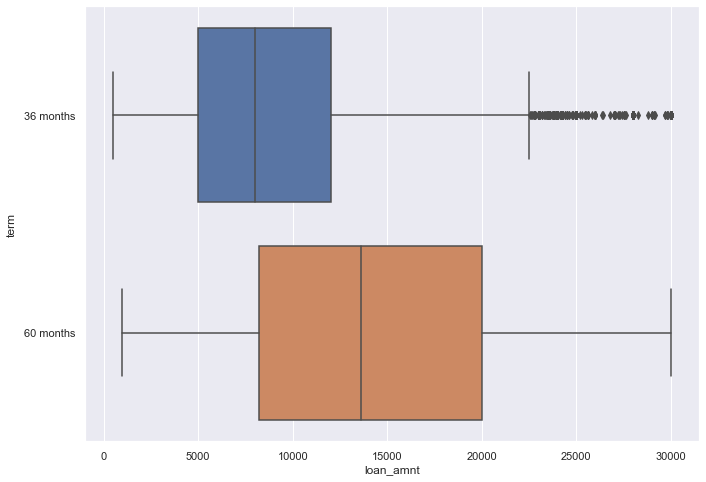

In [139]:
sns.boxplot(data=Loan_data, x='loan_amnt', y='term')

loans with bigger amounts has been given for long term

#### loan amount vs grade

<AxesSubplot:xlabel='loan_amnt', ylabel='grade'>

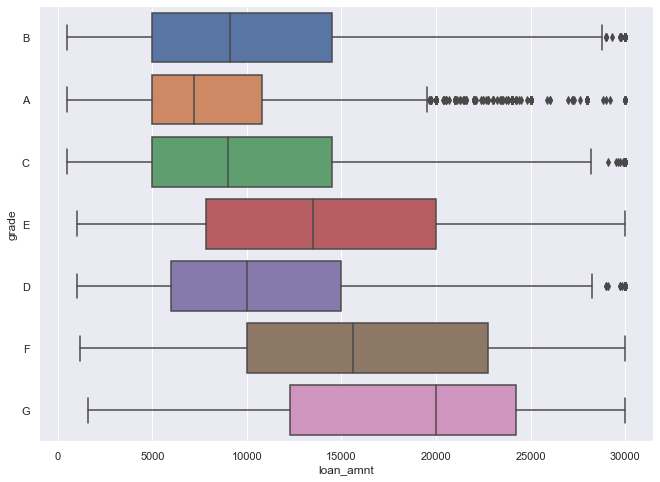

In [140]:
sns.boxplot(data=Loan_data, x='loan_amnt', y='grade')

Grade G has highest average of loan amount. A Grade borrower has the lowest.

<AxesSubplot:xlabel='int_rate_flt', ylabel='term'>

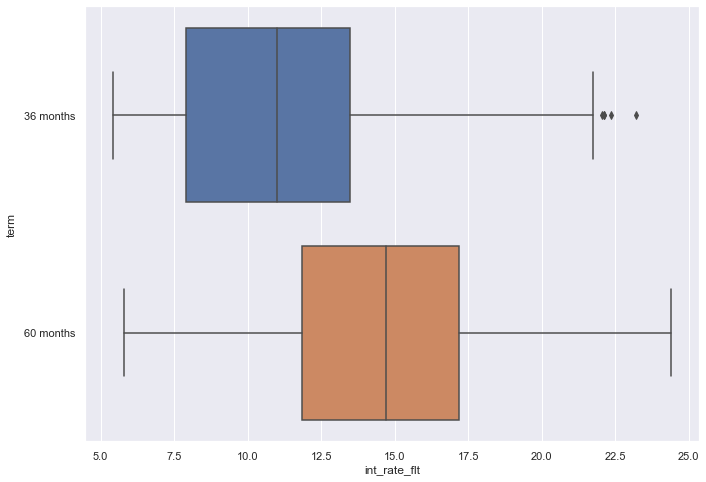

In [141]:
sns.boxplot(data=Loan_data, x='int_rate_flt', y='term')

average Interest rate is lower for 36 months tenure. Long tenure loans are having higer interest rates

<AxesSubplot:xlabel='int_rate_flt', ylabel='purpose'>

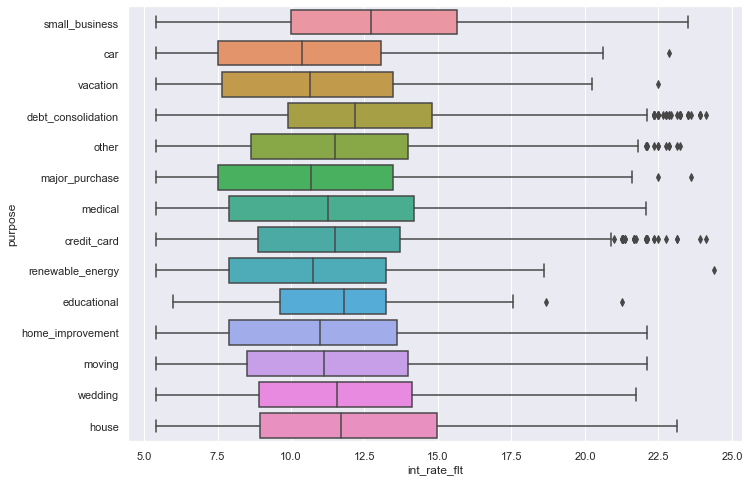

In [142]:
sns.boxplot(data=Loan_data, x='int_rate_flt', y='purpose')

loan taken for small business has higher interest rates. debt consolidation is the second. The loan amount we have seen previosly for credit_card is 3rd one but here if we see the  average interest rate of credit card loan is lower thatn wedding, house and education.

<AxesSubplot:xlabel='grade', ylabel='int_rate_flt'>

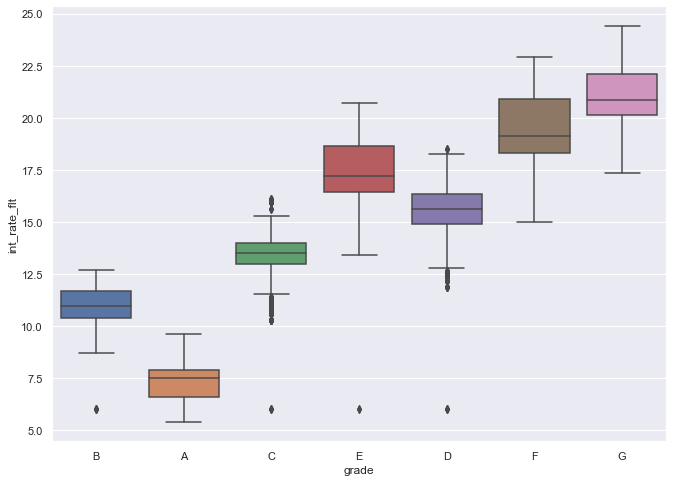

In [143]:
sns.boxplot(data=Loan_data, y='int_rate_flt', x='grade')

Grade G borrowers are paying hihgest interest rate as compared to others.

<AxesSubplot:xlabel='issue_year', ylabel='int_rate_flt'>

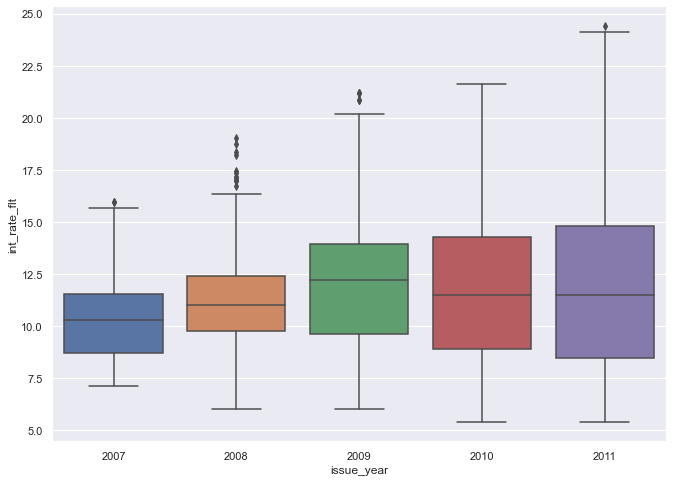

In [144]:
sns.boxplot(data=Loan_data, y='int_rate_flt', x='issue_year')

The average interest rate has been maximum in 2009 and after 2009 it has decreased.

<AxesSubplot:xlabel='dti_cat', ylabel='int_rate_flt'>

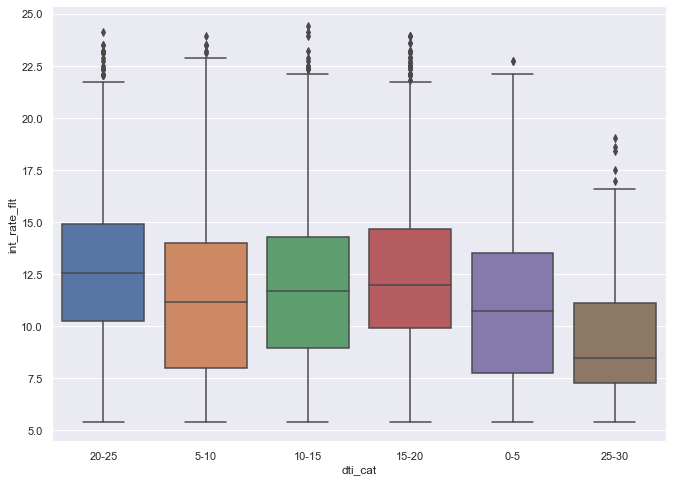

In [145]:
sns.boxplot(data=Loan_data, y='int_rate_flt', x='dti_cat')

The interest rate increases on loans as the debt to income ratio increases except in case of DTI ration 25-30.

<AxesSubplot:xlabel='int_rate_flt_cat', ylabel='annual_inc'>

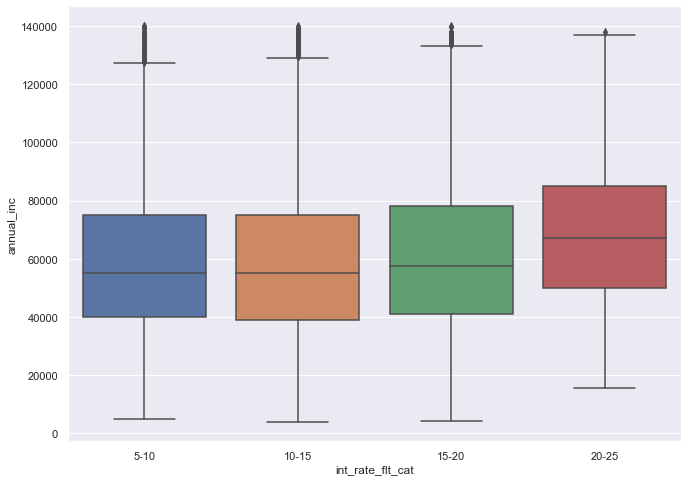

In [146]:
sns.boxplot(data=Loan_data, y='annual_inc', x='int_rate_flt_cat')

Higher interest rates on loan are paid by higher annual income borrowers